###  Wrangling, analyzing and visualizing all h\*ckin' good boys and girls !!  

Twitter user [dog_rates](https://twitter.com/dog_rates) AKA [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs)

###### For more on Doggolingo check link below 
[Dogs Are Doggos: An Internet Language Built Around Love For The Puppers](https://www.npr.org/sections/alltechconsidered/2017/04/23/524514526/dogs-are-doggos-an-internet-language-built-around-love-for-the-puppers)

<a class="anchor" id="jmp2lnks"></a>

<img src="https://drive.google.com/uc?id=1q27qppQ80W_giOg6vN0ngcvl_30Qgpcp" width="100">

* <a href="#gathereddataframes" style='color:#8D38C9'>Gathered DataFrames</a>
* <a href="#assessmentoutcome" style='color:#8D38C9'>Assessment outcome</a>
* <a href="#cln" style='color:#8D38C9'>Data cleaning process</a>
* <a href="#masterdataframes" style='color:#8D38C9'>Master DataFrame(s)</a>
* <a href="#analysis" style='color:#8D38C9'>Analysis and visualization</a>

## Gather

We will be gathering data from different sources and in different formats, the aim is to have a master DataFrame(s) including several details about tweets and dogs to help us in latter analysis and visualization.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import os
import sys
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
from bs4 import BeautifulSoup as bs
from functools import reduce
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import squarify
import random
import warnings;warnings.filterwarnings("ignore")
%matplotlib inline


<a class="anchor" id="twtarch"></a>

In [2]:
# load dataframe
twt_arch_df=pd.read_csv('twitter-archive-enhanced.csv')

**<a href="#jmp2lnks" style='color:#8D38C9'>Notebook Head</a>**

<a class="anchor" id="imgprd"></a>

In [3]:
# download and save image-predictions file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)
with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [4]:
# load dataframe
img_predicts_df=pd.read_csv('image-predictions.tsv', sep='\t')

**<a href="#jmp2lnks" style='color:#8D38C9'>Notebook Head</a>**

<a class="anchor" id="twtapi"></a>

In [5]:
# Uncomment to reproduce, use your own keys for accessing the API

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# consumer_key = ''
# consumer_secret = ''
# access_token = ''
# access_secret = ''

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# tweet_ids = twt_arch_df.tweet_id.values

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print(e)
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)

# save missing tweets, incase needed latter
# fails_df=pd.DataFrame(fails_dict.items())
# fails_df.to_csv('Missing Tweets', index=False)

In [6]:
# Read Tweet Json file and extract data

# list to append data for latter conversion into a datframe
df_list = []

with open ('tweet_json.txt', 'r') as file:
    for line in file:
        tweet_data=json.loads(line)
        t_id=tweet_data['id']
        rt_count=tweet_data["retweet_count"]
        fvt_count=tweet_data["favorite_count"]
        t_txt=tweet_data['full_text']
        df_list.append({
            'tweet_id':t_id,
            'retweet_count':rt_count,
            'favorite_count':fvt_count,
            'full_text':t_txt,
        })

# convert list into dataframe
twt_api_df = pd.DataFrame(df_list, columns=('tweet_id', 'retweet_count', 'favorite_count','full_text'))

**<a href="#jmp2lnks" style='color:#8D38C9'>Notebook Head</a>**

<a class="anchor" id="dgbrd"></a>

In [7]:
url = 'https://dogtime.com/dog-breeds/profiles'
# connect to url
response = requests.get(url)

# Work with HTML file directly without downloading:
soup = bs(response.content, 'lxml')

In [8]:
# obtain all dog breeds details (name,image,info,links)

# list to append data for latter conversion into a datframe
dog_breed_list = []

# list of urls from which breed details will be extracted, this is obtained from reading main url HTML file and locating position of needed data
breed_url_list= ['article-crumbs group-letter letter-a js-letter-section paws',
                 'article-crumbs group-letter letter-b js-letter-section paws',
                 'article-crumbs group-letter letter-c js-letter-section paws',
                 'article-crumbs group-letter letter-d js-letter-section paws',
                 'article-crumbs group-letter letter-e js-letter-section paws',
                 'article-crumbs group-letter letter-f js-letter-section paws',
                 'article-crumbs group-letter letter-g js-letter-section paws',
                 'article-crumbs group-letter letter-h js-letter-section paws',
                 'article-crumbs group-letter letter-i js-letter-section paws',
                 'article-crumbs group-letter letter-j js-letter-section paws',
                 'article-crumbs group-letter letter-k js-letter-section paws',
                 'article-crumbs group-letter letter-l js-letter-section paws',
                 'article-crumbs group-letter letter-m js-letter-section paws',
                 'article-crumbs group-letter letter-n js-letter-section paws',
                 'article-crumbs group-letter letter-o js-letter-section paws',
                 'article-crumbs group-letter letter-p js-letter-section paws',
                 'article-crumbs group-letter letter-r js-letter-section paws',
                 'article-crumbs group-letter letter-s js-letter-section paws',
                 'article-crumbs group-letter letter-t js-letter-section paws',
                 'article-crumbs group-letter letter-v js-letter-section paws',
                 'article-crumbs group-letter letter-w js-letter-section paws',
                 'article-crumbs group-letter letter-x js-letter-section paws',
                 'article-crumbs group-letter letter-y js-letter-section paws',
                ]


# iterate through the list and extract required data
for clss in breed_url_list:
    dog_breed= soup.find('div', class_=clss).find_all(class_="list-item-title")
    dog_breed_info = soup.find('div', class_=clss).find_all(class_="list-item-img")
    dog_breed_img = soup.find('div', class_=clss).find_all(class_="list-item-breed-img")
    for text in dog_breed:
        dog_breed_list.append({'breed':text.text})
    for inf in dog_breed_info:
        dog_breed_list.append({'breed_info_link':inf.attrs['href']})
    for img in dog_breed_img:
        dog_breed_list.append({'breed_img_link':img.attrs['src']})  

# creat df and save data to csv file
breed_df = pd.DataFrame(dog_breed_list, columns=['breed', 'breed_info_link', 'breed_img_link'])
breed_df = breed_df.apply(lambda x: pd.Series(x.dropna().values))
breed_df.to_csv('dog_breed_info.csv', index=False)

**<a href="#jmp2lnks" style='color:#8D38C9'>Notebook Head</a>**

<a class="anchor" id="dgbrdinfo"></a>

In [9]:
# # This cell took sometime to run, 385 url to pharse. Uncomment to reproduce.
# # U can skip this step, it is just to extracts info text for display in the dataframe instead of going to the web site and reading from there
# # breed info links already extracted

# # info text links from which data will be extracted 

# url_array=breed_df.breed_info_link.values

# breed_info_text_list=[]
# count = 0

# # iterate 
# for i in url_array:
#     count +=1
#     print(str(count) + ": " + str(i))
#     response=requests.get(i)
#     soup=bs(response.content, 'lxml')
#     breed_info_text = soup.find('div', class_='breeds-single-intro').find('p').text
#     breed_info_text_list.append({i.split('/')[-1]:breed_info_text})
#     print("Success")

# # save
# breed_info_df = pd.DataFrame([(key, value) for i in breed_info_text_list for key, value in i.items()], columns=['breed','breed_info_text'])
# breed_info_df.to_csv('dog_breed_info_text.csv', index=False)

<a class="anchor" id="gathereddataframes"></a>
### Gathered DataFrames

* <a href="#twtarch" style='color:#8D38C9'>Twitter Archive</a>
* <a href="#imgprd" style='color:#8D38C9'>Image Predictions</a>
* <a href="#twtapi" style='color:#8D38C9'>Twitter API</a>
* <a href="#dgbrd" style='color:#8D38C9'>Dog Breed</a>
* <a href="#dgbrdinfo" style='color:#8D38C9'>Dog Breed Info</a>

**<a href="#jmp2lnks" style='color:#8D38C9'>Notebook Head</a>**

## Assess

In [10]:
# Adjusting  display options, increase width and row numbers to remove truncation
pd.options.display.max_colwidth=150
pd.options.display.max_rows=100
pd.options.display.large_repr='truncate'

**<a href="#assessmentoutcome" style='color:#8D38C9'>Assessment outcome</a>**

<a class="anchor" id="arcdf"></a>

In [11]:
twt_arch_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [12]:
twt_arch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
twt_arch_df.describe().round()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.0,2356.0
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.0,10.0
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,46.0,7.0
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.0,0.0
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.0,10.0
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.0,10.0
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.0,10.0
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.0,170.0


In [14]:
twt_arch_df.tweet_id.duplicated().sum()

0

In [15]:
# assessing incorrect rating scale for denominator, official is 10
fltrd_rtng_dnm=twt_arch_df[(twt_arch_df.rating_denominator!=10) & twt_arch_df.in_reply_to_status_id.isnull() & twt_arch_df.retweeted_status_id.isnull()].drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'], axis=1)
fltrd_rtng_dnm.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t ...,24,7,Sam,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150,None,None,None,None,None
1068,740373189193256964,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11,None,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170,this,None,None,None,None


In [16]:
fltrd_rtng_dnm.tweet_id.count()

17

In [17]:
# assessing incorrect rating extraction
fltrd_rtng_num=twt_arch_df[(twt_arch_df.rating_numerator!=10) & (twt_arch_df.rating_denominator==10) & twt_arch_df.in_reply_to_status_id.isnull() & twt_arch_df.retweeted_status_id.isnull()].drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'], axis=1)
fltrd_rtng_num.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1545,689289219123089408,2016-01-19 03:32:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Someone sent me this without any context and every aspect of it is spectacular. 13/10 please enjoy https://t.co/Rxrd4hPmp4,13,10,None,None,None,None,None
83,876537666061221889,2017-06-18 20:30:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I can say with the pupmost confidence that the doggos who assisted with this search are heroic as h*ck. 14/10 for all https://t.co/8yoc1CNTsu,14,10,None,None,None,None,None
1590,686618349602762752,2016-01-11 18:39:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Olivia. She just saw an adult wearing crocs. 11/10 poor pupper. No one should witness such a thing https://t.co/yJVTi1DjJc,11,10,Olivia,None,None,pupper,None
1589,686683045143953408,2016-01-11 22:56:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Mona. She's a Yarborough Splishnsplash. Lost body during Nam. 11/10 revolutionary pupper https://t.co/pgD6h0yhgz,11,10,Mona,None,None,pupper,None
1623,684902183876321280,2016-01-07 00:59:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Perry. He's an Augustus Gloopster. Very condescending. Makes up for it with the sneaky tongue slip. 11/10 https://t.co/JVvIrUmTkR,11,10,Perry,None,None,None,None


In [18]:
fltrd_rtng_num.tweet_id.count()

1644

In [19]:
# examine top ratings
fltrd_rtng_num.sort_values('rating_numerator', ascending=False).head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10,Atticus,None,None,None,None
2074,670842764863651840,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,420,10,None,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://...,27,10,Sophie,None,None,pupper,None
1712,680494726643068929,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10,None,None,None,None,None


In [20]:
# identify magnitude of tweets having float rating scale noted above
twt_arch_df[twt_arch_df.text.str.contains('((?:\d+\.)\d+)\/(\d+)')].drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'], axis=1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10,Bella,None,None,None,None
340,832215909146226688,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10,Logan,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://...,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10,None,None,None,None,None
1712,680494726643068929,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10,None,None,None,None,None


In [21]:
# check for proper name extraction
fltrd_name=twt_arch_df[twt_arch_df.name != 'None'].drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'], axis=1)
fltrd_name

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,2,10,an,None,None,None,None
2350,666050758794694657,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,10,10,a,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6,10,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9,10,a,None,None,None,None


In [22]:
# inspect unusual names
twt_arch_df.name.value_counts().to_frame().sort_index(ascending=False)

,name
very,5
unacceptable,1
this,1
the,8
such,1
...,...
Aiden,1
Adele,1
Acro,1
Ace,1


In [23]:
# assess wrong extraction
twt_arch_df[twt_arch_df.text.str.contains('name')].drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'], axis=1).head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
35,885518971528720385,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,14,10,None,None,None,None,None
149,863079547188785154,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https:...",14,10,None,None,None,None,None
168,859607811541651456,2017-05-03 03:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t...,13,10,None,None,None,None,puppo
373,828376505180889089,2017-02-05 22:55:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Beebop. Her name means ""Good Dog"" in robot. She also was a star on the field today. 13/10 would pet well https://t.co/HKBVZqXFNR",13,10,Beebop,None,None,None,None
603,798628517273620480,2016-11-15 20:47:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7,12,10,None,None,None,None,None


In [24]:
# assess wrong extraction
twt_arch_df[twt_arch_df.name.str.islower()].drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'], axis=1).head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,14,10,such,None,None,None,None
56,881536004380872706,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/g...,14,10,a,None,None,pupper,None
118,869988702071779329,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,12,10,quite,None,None,None,None
169,859196978902773760,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,12,10,quite,None,None,None,None
193,855459453768019968,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https:/...",12,10,quite,None,None,None,None


In [25]:
# assess wrong stage extraction, substitute doggo in both conditions with other stages to switch display
twt_arch_df[twt_arch_df.text.str.contains('doggo') & ~(twt_arch_df.doggo != 'None')].drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'], axis=1).head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
83,876537666061221889,2017-06-18 20:30:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I can say with the pupmost confidence that the doggos who assisted with this search are heroic as h*ck. 14/10 for all https://t.co/8yoc1CNTsu,14,10,None,None,None,None,None
268,841439858740625411,2017-03-14 00:04:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have some incredible doggos for #K9VeteransDay. All brave as h*ck. Salute your dog in solidarity. 14/10 for all https://t.co/SVNMdFqKDL,14,10,None,None,None,None,None
302,836648853927522308,2017-02-28 18:46:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @SchafeBacon2016: @dog_rates Slightly disturbed by the outright profanity, but confident doggos were involved. 11/10, would tailgate aga…",11,10,None,None,None,None,None
475,816062466425819140,2017-01-02 23:23:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Jack. He's one of the rare doggos that doesn't mind baths. 11/10 click the link to see how you can help Jack!\n\nhttps://…,11,10,Jack,None,None,None,None
477,815990720817401858,2017-01-02 18:38:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jack. He's one of the rare doggos that doesn't mind baths. 11/10 click the link to see how you can help Jack!\n\nhttps://t.co/r4W111FzAq http...,11,10,Jack,None,None,None,None


In [26]:
# assess duplicate stages
twt_arch_df[(twt_arch_df.doggo != 'None') & (twt_arch_df.floofer !='None')].index

Int64Index([200], dtype='int64')

In [27]:
# assess duplicate stages
twt_arch_df[(twt_arch_df.doggo != 'None') & (twt_arch_df.pupper !='None')].index

Int64Index([460, 531, 565, 575, 705, 733, 778, 822, 889, 956, 1063, 1113], dtype='int64')

In [28]:
# assess duplicate stages
twt_arch_df[(twt_arch_df.doggo != 'None') & (twt_arch_df.puppo !='None')].index

Int64Index([191], dtype='int64')

In [29]:
# assess duplicate stages
twt_arch_df[(twt_arch_df.doggo != 'None') & (twt_arch_df.pupper !='None') & (twt_arch_df.in_reply_to_status_id.isnull()) & (twt_arch_df.retweeted_status_id.isnull())].drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'], axis=1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https...",13,10,Dido,doggo,None,pupper,None
531,808106460588765185,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,12,10,None,doggo,None,pupper,None
575,801115127852503040,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",12,10,None,doggo,None,pupper,None
889,759793422261743616,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",12,10,Maggie,doggo,None,pupper,None
956,751583847268179968,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,5,10,None,doggo,None,pupper,None
1063,741067306818797568,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,12,10,just,doggo,None,pupper,None
1113,733109485275860992,2016-05-19 01:38:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",12,10,None,doggo,None,pupper,None


**<a href="#assessmentoutcome" style='color:#8D38C9'>Assessment outcome</a>**

<a class="anchor" id="imgdf"></a>

In [30]:
img_predicts_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [31]:
img_predicts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
img_predicts_df.describe().round(5)

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.00000,2075.00000,2075.00000,2075.00000
mean,7.384514e+17,1.20386,0.59455,0.13459,0.06032
std,6.785203e+16,0.56188,0.27117,0.10067,0.05091
min,6.660209e+17,1.00000,0.04433,0.00000,0.00000
25%,6.764835e+17,1.00000,0.36441,0.05389,0.01622
50%,7.119988e+17,1.00000,0.58823,0.11818,0.04944
75%,7.932034e+17,1.00000,0.84386,0.19557,0.09181
max,8.924206e+17,4.00000,1.00000,0.48801,0.27342


In [33]:
img_predicts_df.jpg_url.duplicated().sum()

66

In [34]:
# inspect duplicates
img_predicts_df[img_predicts_df.jpg_url.duplicated()].sort_values('tweet_id').head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False


In [35]:
# assess predictions credibility
img_predicts_df[img_predicts_df.p1_conf>=0.9]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2054,888078434458587136,https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg,1,French_bulldog,0.995026,True,pug,0.000932,True,bull_mastiff,0.000903,True
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
2061,889638837579907072,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1,French_bulldog,0.991650,True,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True
2062,889665388333682689,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True


In [36]:
# assessing for false negative
img_predicts_df[~(img_predicts_df.p1_dog) & ~(img_predicts_df.p2_dog) & ~(img_predicts_df.p3_dog)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [37]:
# assessing false positive
img_predicts_df[(img_predicts_df.p1_dog) & (img_predicts_df.p2_dog) & (img_predicts_df.p3_dog)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [38]:
# assess predictions credibility
img_predicts_df[img_predicts_df.p1_conf==img_predicts_df.p1_conf.min()].append(img_predicts_df[img_predicts_df.p2_conf==img_predicts_df.p2_conf.min()]).append(img_predicts_df[img_predicts_df.p3_conf==img_predicts_df.p3_conf.min()]).round(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
38,666644823164719104,https://pbs.twimg.com/media/CUBl6IwVAAA9_zT.jpg,1,Ibizan_hound,0.04433,True,Pembroke,0.04321,True,West_Highland_white_terrier,0.03891,True
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.00000,False,prayer_rug,0.00000,False,doormat,0.00000,False
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.00000,False,prayer_rug,0.00000,False,doormat,0.00000,False


In [39]:
# assess predictions credibility
img_predicts_df[img_predicts_df.p1_conf==img_predicts_df.p1_conf.max()].append(img_predicts_df[img_predicts_df.p2_conf==img_predicts_df.p2_conf.max()]).append(img_predicts_df[img_predicts_df.p3_conf==img_predicts_df.p3_conf.max()]).round(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.00000,False,prayer_rug,0.00000,False,doormat,0.00000,False
986,707693576495472641,https://pbs.twimg.com/media/CdI7jDnW0AA2dtO.jpg,1,bathtub,0.49952,False,tub,0.48801,False,washbasin,0.00930,False
1071,716439118184652801,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,Siberian_husky,0.39650,True,malamute,0.31705,True,Eskimo_dog,0.27342,True


**<a href="#assessmentoutcome" style='color:#8D38C9'>Assessment outcome</a>**

<a class="anchor" id="apidf"></a>

In [40]:
twt_api_df.head()

,tweet_id,retweet_count,favorite_count,full_text
0,892420643555336193,7353,35012,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1,892177421306343426,5482,30320,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/..."
2,891815181378084864,3624,22802,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3,891689557279858688,7535,38285,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4,891327558926688256,8120,36559,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/..."


In [41]:
twt_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   int64 
 1   retweet_count   2331 non-null   int64 
 2   favorite_count  2331 non-null   int64 
 3   full_text       2331 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.0+ KB


**<a href="#assessmentoutcome" style='color:#8D38C9'>Assessment outcome</a>**

<a class="anchor" id="brdf"></a>

In [42]:
breed_df.head()

,breed,breed_info_link,breed_img_link
0,Afador,https://dogtime.com/dog-breeds/afador,https://www.dogtime.com/assets/uploads/2019/08/afador-mixed-dog-breed-pictures-cover-650x368.jpg
1,Affenhuahua,https://dogtime.com/dog-breeds/affenhuahua,https://www.dogtime.com/assets/uploads/2020/02/affenhuahua-mixed-dog-breed-pictures-COVER-650x368.jpg
2,Affenpinscher,https://dogtime.com/dog-breeds/affenpinscher,https://www.dogtime.com/assets/uploads/2011/01/file_23096_affenpinscher-300x189.jpg
3,Afghan Hound,https://dogtime.com/dog-breeds/afghan-hound,https://www.dogtime.com/assets/uploads/2011/01/file_23004_afghan-hound-300x189.jpg
4,Airedale Terrier,https://dogtime.com/dog-breeds/airedale-terrier,https://www.dogtime.com/assets/uploads/2011/01/file_23050_airedale-terrier-300x189.jpg


In [43]:
breed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   breed            385 non-null    object
 1   breed_info_link  385 non-null    object
 2   breed_img_link   385 non-null    object
dtypes: object(3)
memory usage: 9.1+ KB


In [44]:
breed_df.breed.duplicated().sum()

0

**<a href="#assessmentoutcome" style='color:#8D38C9'>Assessment outcome</a>**

<a class="anchor" id="brinfdf"></a>

In [45]:
# Load df from saved csv to avoid running scrapping code
breed_info_df=pd.read_csv('dog_breed_info_text.csv')
breed_info_df.head()

,breed,breed_info_text
0,afador,"The Afador is a mixed breed dog–a cross between the Afghan Hound and Labrador Retriever dog breeds. Loyal, energetic, and affectionate, these pups..."
1,affenhuahua,"The Affenhuahua is a mixed breed dog–a cross between the Chihuahua and Affenpinscher dog breeds. Petite, sassy, and highly energetic, these pups i..."
2,affenpinscher,"Dogs of the Affenpinscher breed were originally created to act as ratters in homes, stables, and shops. Bred down in size, they moved up in the wo..."
3,afghan-hound,"The Afghan Hound is elegance personified. This unique, ancient dog breed has an appearance quite unlike any other: dramatic silky coat, exotic fac..."
4,airedale-terrier,"Known as the “King of Terriers,” the Airedale is indeed the largest of all terriers. The dog breed originated in the Aire Valley of Yorkshire and ..."


In [46]:
breed_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   breed            385 non-null    object
 1   breed_info_text  385 non-null    object
dtypes: object(2)
memory usage: 6.1+ KB


In [47]:
breed_info_df.breed.duplicated().sum()

0

<a class="anchor" id="assessmentoutcome"></a>
### Assessment outcome
<a class="anchor" id="qlt"></a>
* <a href="#qualityissues" style='color:#8D38C9'>A-Quality Issues</a>
    * <a href="#arcdf" style='color:#C45AEC'>A.1-Twitter Archive Dataframe:</a>
      * [A.1.1-Variables does not conform to our defined schema](#A1.1)
      * [A.1.2-Time stamp dtype not properly identified](#A1.2)
      * [A.1.3-Some tweets have misleading rating](#A1.3)
      * [A.1.4-Dog name column has several wrong input ('a','the','this','an'), missing names are misrepresented and sometimes not properly extracted from tweet text](#A1.4)
      * [A.1.5-Multiple dog stage occurrences for a single tweet](#A1.5)
      * [A.1.6-Dog stage not properly extracted and missing values are misrepresented](#A1.6)
    * <a href="#imgdf" style='color:#C45AEC'>A.2-Image predictions Dataframe:</a>
      * [A.2.1-Duplicated records, mainly related to retweets and replies](#A1.1)
      * [A.2.2-Image prediction results are somewhat misleading](#A2.2)
      * [A.2.3-Some breed names are incorrect and sometimes misleading](#A2.3)
    * <a href="#brdf" style='color:#C45AEC'>A.3-Breed Dataframe:</a>
      * [A.3.1-Breed column's naming convention is not unified](#A2.3)
    * <a href="#brinfdf" style='color:#C45AEC'>A.4-Breed Info Dataframe:</a>
      * [A.4.1-Breed column's naming convention is not unified](#A2.3)
    ----
<a class="anchor" id="tid"></a>
* <a href="#tidinessissues" style='color:#8D38C9'>B-Tidiness Issues</a>
    * <a href="#arcdf" style='color:#C45AEC'>B.1-Twitter Archive Dataframe:</a>
      * [B.1.1-Tweet text column include both tweet text and links](#B1.1)
      * [B.1.2-One variable in four columns. I.e: 'doggo', 'floofer' are different representations of a single variable 'Dog Stage'](#A1.6)
      * [B.1.3-Total entries does not match that in Image predictions Dataframe](#B1.3)
    * <a href="#imgdf" style='color:#C45AEC'>B.2-Image predictions Dataframe:</a>
      * [B.2.1-All breed information should be included in the Dataframe](#A2.3)


**<a href="#masterdataframes" style='color:#8D38C9'>Master Dataframe(s)</a>**

**<a href="#analysis" style='color:#8D38C9'>Analysis and visualization</a>**

**<a href="#jmp2lnks" style='color:#8D38C9'>Notebook Head</a>**


<a class="anchor" id="cln"></a>
## Clean

In [48]:
# Making copies of gathered DataFrames
df_twt_arch_c=twt_arch_df.copy()
df_img_pred_c=img_predicts_df.copy()
df_twt_api_c=twt_api_df.copy()
df_breed_c=breed_df.copy()
df_breed_inf_c=breed_info_df.copy()

<a class="anchor" id="qualityissues"></a>
### Quality Issues

<a class="anchor" id="A1.1"></a>
#### A.1.1 - Variables does not conform to our defined schema
---
##### Define

A total of 181(retweets) and 78(replies) are included in both archive and prediction Dataframe(s). We'd like to analyze original ratings of dogs only, so having retweets and replies in the dataframe does not follow our defined schema. We'll:

- Identify non-null rows in all (in_reply_ / retweeted_) columns. this will also clear issue --> B.2.1 Duplicated records, mainly related to retweets and replies <--
- Remove these columns all together since they wont be used in our analysis.
- Bonus: Remove 'source' and 'expanded_urls' columns also since they won't be used in our analysis.

##### Code

In [49]:
# filter and drop non-null rows, non null indicates that this tweet is either a reply or retweet
df_twt_arch_c=df_twt_arch_c[df_twt_arch_c.in_reply_to_status_id.isnull() & df_twt_arch_c.in_reply_to_user_id.isnull() & df_twt_arch_c.retweeted_status_id.isnull() & df_twt_arch_c.retweeted_status_user_id.isnull() & df_twt_arch_c.retweeted_status_timestamp.isnull()]
df_twt_arch_c.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','source','expanded_urls'], axis=1, inplace=True)
df_twt_arch_c.reset_index(drop=True, inplace=True)

In [50]:
# removing retweets and replies data from predictions dataframe
df_img_pred_c=df_img_pred_c[df_img_pred_c.tweet_id.isin(df_twt_arch_c.tweet_id)]
df_img_pred_c.reset_index(drop=True, inplace=True)

##### Test

In [51]:
df_twt_arch_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   text                2097 non-null   object
 3   rating_numerator    2097 non-null   int64 
 4   rating_denominator  2097 non-null   int64 
 5   name                2097 non-null   object
 6   doggo               2097 non-null   object
 7   floofer             2097 non-null   object
 8   pupper              2097 non-null   object
 9   puppo               2097 non-null   object
dtypes: int64(3), object(7)
memory usage: 164.0+ KB


In [52]:
df_img_pred_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1971 non-null   int64  
 1   jpg_url   1971 non-null   object 
 2   img_num   1971 non-null   int64  
 3   p1        1971 non-null   object 
 4   p1_conf   1971 non-null   float64
 5   p1_dog    1971 non-null   bool   
 6   p2        1971 non-null   object 
 7   p2_conf   1971 non-null   float64
 8   p2_dog    1971 non-null   bool   
 9   p3        1971 non-null   object 
 10  p3_conf   1971 non-null   float64
 11  p3_dog    1971 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 144.5+ KB


**<a href="#qlt" style='color:#8D38C9'>Quality Issues</a>**

**<a href="#jmp2lnks" style='color:#8D38C9'>Notebook Head</a>**

<a class="anchor" id="A1.2"></a>
#### A.1.2 - Time stamp dtype not properly identified
---
##### Define
- Change timestamp dtype to datetime
- Bonus: change header format of 'timestamp' and 'name' columns to be more representative

##### Code

In [53]:
# convert dtype to date time and rename the header
df_twt_arch_c['timestamp']=pd.to_datetime(df_twt_arch_c['timestamp']).dt.tz_localize(None)
df_twt_arch_c.rename(columns={'timestamp': 'tweet_time_stamp', 'name': 'dog_name'}, inplace=True)

##### Test

In [54]:
df_twt_arch_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   int64         
 1   tweet_time_stamp    2097 non-null   datetime64[ns]
 2   text                2097 non-null   object        
 3   rating_numerator    2097 non-null   int64         
 4   rating_denominator  2097 non-null   int64         
 5   dog_name            2097 non-null   object        
 6   doggo               2097 non-null   object        
 7   floofer             2097 non-null   object        
 8   pupper              2097 non-null   object        
 9   puppo               2097 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 164.0+ KB


**<a href="#qlt" style='color:#8D38C9'>Quality Issues</a>**

**<a href="#jmp2lnks" style='color:#8D38C9'>Notebook Head</a>**

<a class="anchor" id="A1.3"></a>
#### A.1.3 - Some tweets have misleading rating
---
##### Define

here we have 3 issues as follows:
- 17 tweets denominator is not matching the official rating scale of 10
- 5 out of 17 have rating not properly extracted due to the existence of multiple ratings in the tweet text
- 5 tweets have rating not properly extracted because the rating scale mentioned in tweet text is float not int

We'll clean the above issues in a reverse order:
- Apply correct rating if not properly extracted from tweet text
- Change denominator of 17 to 10 to match official rating scale of 10

##### Code

In [55]:
# filter all tweets with wrong rating
wrong_rating_df1 = df_twt_arch_c[(df_twt_arch_c.rating_denominator!=10) & df_twt_arch_c.text.str.contains('((?:\d+\.)?\d+)\/(\d+)')]

# extract correct rating to a separate dataframe
correct_ratings_df = wrong_rating_df1.text.str.extractall('((?:\d+\.)?\d+)\/(\d+)').unstack()

# remove multiIndex and rename columns
correct_ratings_df.columns = correct_ratings_df.columns.droplevel()
correct_ratings_df.drop([0, 0], axis=1, inplace=True)
correct_ratings_df.dropna(inplace=True)
correct_ratings_df.columns=['rtng_num','rtng_dnm']

# apply correct rating
df_twt_arch_c.loc[df_twt_arch_c.index.isin(correct_ratings_df.index), 'rating_numerator'] = correct_ratings_df['rtng_num']

In [56]:
# filter all tweets with float rating
wrong_rating_df2 = df_twt_arch_c[df_twt_arch_c.text.str.contains('((?:\d+\.)\d+)\/(\d+)')]

# extract correct rating to a separate dataframe
float_ratings_df = wrong_rating_df2.text.str.extract('((?:\d+\.)?\d+)\/(\d+)',expand=True)

# rename columns
float_ratings_df.columns=['rtng_num','rtng_dnm']

# apply correct rating and dtype
df_twt_arch_c.loc[df_twt_arch_c.index.isin(float_ratings_df.index), 'rating_numerator'] = float_ratings_df['rtng_num']
df_twt_arch_c.rating_numerator=pd.to_numeric(df_twt_arch_c.rating_numerator)

In [57]:
df_twt_arch_c.loc[(df_twt_arch_c.rating_denominator!=10) ,'rating_denominator']=10

##### Test

In [58]:
df_twt_arch_c.loc[df_twt_arch_c.index.isin(correct_ratings_df.index)]

,tweet_id,tweet_time_stamp,text,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
853,740373189193256964,2016-06-08 02:41:38,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",14.0,10,None,None,None,None,None
948,722974582966214656,2016-04-21 02:25:47,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,13.0,10,None,None,None,None,None
985,716439118184652801,2016-04-03 01:36:11,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11.0,10,Bluebert,None,None,None,None
1426,682962037429899265,2016-01-01 16:30:13,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,10.0,10,Darrel,None,None,None,None
2076,666287406224695296,2015-11-16 16:11:11,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,9.0,10,an,None,None,None,None


In [59]:
df_twt_arch_c.loc[df_twt_arch_c.index.isin(float_ratings_df.index)]

,tweet_id,tweet_time_stamp,text,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
41,883482846933004288,2017-07-08 00:28:19,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10,Bella,None,None,None,None
528,786709082849828864,2016-10-13 23:23:56,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10,Logan,None,None,None,None
586,778027034220126208,2016-09-20 00:24:34,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://...,11.27,10,Sophie,None,None,pupper,None
1474,680494726643068929,2015-12-25 21:06:00,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10,None,None,None,None,None


In [60]:
df_twt_arch_c[df_twt_arch_c.rating_denominator!=10]

,tweet_id,tweet_time_stamp,text,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo


In [61]:
df_twt_arch_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   int64         
 1   tweet_time_stamp    2097 non-null   datetime64[ns]
 2   text                2097 non-null   object        
 3   rating_numerator    2097 non-null   float64       
 4   rating_denominator  2097 non-null   int64         
 5   dog_name            2097 non-null   object        
 6   doggo               2097 non-null   object        
 7   floofer             2097 non-null   object        
 8   pupper              2097 non-null   object        
 9   puppo               2097 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 164.0+ KB


**<a href="#qlt" style='color:#8D38C9'>Quality Issues</a>**

**<a href="#jmp2lnks" style='color:#8D38C9'>Notebook Head</a>**

<a class="anchor" id="A1.4"></a>
#### A.1.4 - Dog name column has several wrong input ('a','the','this','an'), missing names are misrepresented and sometimes not properly extracted from tweet text
---
##### Define
Here we have 2 issues that we will address as follows:
- Change lower case words and 'None' inputs to NaN. Lower case words are always not dog names.
- Search and extract dog names that are already mentioned in tweet text.

##### Code

In [62]:
# change all lower case words and and missing names to 'not mentioned'
df_twt_arch_c.loc[df_twt_arch_c.dog_name.str.islower(),'dog_name']= np.nan
df_twt_arch_c.loc[df_twt_arch_c.dog_name=='None','dog_name']= np.nan

# Search and extract all text following the word 'named'
index_1=df_twt_arch_c.text.str.extract(r'(named?\s\w+.\w+)').dropna()

# slice out names,dog names mentioned in two forms either following 'is' or 'named'
index_2=index_1[0].str.extract(r'(is?\s\w+)').dropna()
index_3=index_1[0].str.extract(r'^(named\s\w+)').dropna()

# apply correct names
df_twt_arch_c.loc[df_twt_arch_c.index.isin(index_2.index), 'dog_name']=index_2[0].str.slice(3)
df_twt_arch_c.loc[df_twt_arch_c.index.isin(index_3.index), 'dog_name']=index_3[0].str.slice(6)

# this tweet had name mentioned after 'is', so will change individually
df_twt_arch_c.loc[df_twt_arch_c.tweet_id==666739327293083650, 'dog_name']='Lugan'

##### Test

In [63]:
df_twt_arch_c.dog_name.value_counts().sample(20)

Harlso     1
Misty      2
Zoey       5
Noah       1
Jazzy      1
Jarod      1
Apollo     1
Striker    1
Gin        1
Cupid      1
Dot        1
Mattie     1
Ginger     1
Carbon     1
Smiley     1
Opal       2
Sweets     1
Gizmo      3
Phil       4
Grady      1
Name: dog_name, dtype: int64

In [64]:
df_twt_arch_c.loc[df_twt_arch_c.index.isin(index_2.index)].head()

,tweet_id,tweet_time_stamp,text,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
32,885518971528720385,2017-07-13 15:19:09,I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,14.0,10,Howard,None,None,None,None
140,859607811541651456,2017-05-03 03:17:27,Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t...,13.0,10,Zoey,None,None,None,puppo
657,765395769549590528,2016-08-16 03:52:26,This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,13.0,10,Zoey,None,None,None,None
1441,682047327939461121,2015-12-30 03:55:29,We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT,10.0,10,Thea,None,None,None,None
1496,679736210798047232,2015-12-23 18:51:56,This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP,9.0,10,Sabertooth,None,None,None,None


In [65]:
df_twt_arch_c.loc[df_twt_arch_c.index.isin(index_3.index)].head()

,tweet_id,tweet_time_stamp,text,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
1610,675706639471788032,2015-12-12 15:59:51,This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,10.0,10,Wylie,None,None,None,None
1704,673636718965334016,2015-12-06 22:54:44,This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,10.0,10,Kip,None,None,None,None
1783,671743150407421952,2015-12-01 17:30:22,This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,11.0,10,Jacob,None,None,None,None
1813,671147085991960577,2015-11-30 02:01:49,This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,9.0,10,Rufus,None,None,None,None
1863,670427002554466305,2015-11-28 02:20:27,This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo,9.0,10,Spork,None,None,None,None


In [66]:
df_twt_arch_c.loc[df_twt_arch_c.tweet_id==666739327293083650]

,tweet_id,tweet_time_stamp,text,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
2054,666739327293083650,2015-11-17 22:06:57,This is Lugan. He is a Bohemian Rhapsody. Very confused dog. Thinks his name is Rocky. Not amused by the snows 10/10 https://t.co/tI3uFLDHBI,10.0,10,Lugan,None,None,None,None


**<a href="#qlt" style='color:#8D38C9'>Quality Issues</a>**

**<a href="#jmp2lnks" style='color:#8D38C9'>Notebook Head</a>**

<a class="anchor" id="A1.5"></a>
#### A.1.5 - Multiple dog stage occurrences for a single tweet
---
##### Define

- Delete wrong entries based on tweet text.
- Merge the multiple values into one for tweets having multiple dogs.
- Bonus: Fix missing dog names if already included in tweet text but referenced as 'not mentioned'

##### Code

In [67]:
# filter and apply correct dog stage
df_twt_arch_c[(df_twt_arch_c.doggo != 'None') & (df_twt_arch_c.floofer !='None')].index
df_twt_arch_c.loc[161,'doggo']='None'

In [68]:
# filter and apply correct dog stage
df_twt_arch_c[(df_twt_arch_c.doggo != 'None') & (df_twt_arch_c.pupper !='None')]

,tweet_id,tweet_time_stamp,text,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
358,817777686764523521,2017-01-07 16:59:28,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https...",13.0,10,Dido,doggo,None,pupper,None
416,808106460588765185,2016-12-12 00:29:28,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,12.0,10,NaN,doggo,None,pupper,None
446,801115127852503040,2016-11-22 17:28:25,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,12.0,10,Bones,doggo,None,pupper,None
536,785639753186217984,2016-10-11 00:34:48,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https...,10.0,10,Pinot,doggo,None,pupper,None
562,781308096455073793,2016-09-29 01:42:20,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",12.0,10,NaN,doggo,None,pupper,None
689,759793422261743616,2016-07-31 16:50:42,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",12.0,10,Maggie,doggo,None,pupper,None
748,751583847268179968,2016-07-09 01:08:47,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,5.0,10,NaN,doggo,None,pupper,None
848,741067306818797568,2016-06-10 00:39:48,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,12.0,10,NaN,doggo,None,pupper,None
897,733109485275860992,2016-05-19 01:38:16,"Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",12.0,10,NaN,doggo,None,pupper,None


In [69]:
# Changes to be done based on visual inspection of above filter:
# 358'doggo=None' - 446'doggo=None' - 416'Burke/Dexter pupper/doggo'  - 689'Lila/Maggie pupper/doggo' - 748'doggo' - 848'pupper/doggo' - 897'pupper/doggo'
df_twt_arch_c.loc[[358,446,536,562],'doggo']='None'
df_twt_arch_c.loc[[416,689],['dog_name','doggo','pupper']]=[('Burke/Dexter','pupper/doggo','None'),('Lila/Maggie','pupper/doggo','None')]
df_twt_arch_c.loc[[748,536,562],'pupper']='None'
df_twt_arch_c.loc[[848,897],['doggo','pupper']]='pupper/doggo','None'

In [70]:
df_twt_arch_c[(df_twt_arch_c.doggo != 'None') & (df_twt_arch_c.puppo !='None')].index
df_twt_arch_c.loc[154,'doggo']='None'

##### Test

In [71]:
df_twt_arch_c.iloc[[161,358,416,446,689,748,848,897,154]]

,tweet_id,tweet_time_stamp,text,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
161,854010172552949760,2017-04-17 16:34:26,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https...",11.0,10,NaN,None,floofer,None,None
358,817777686764523521,2017-01-07 16:59:28,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https...",13.0,10,Dido,None,None,pupper,None
416,808106460588765185,2016-12-12 00:29:28,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,12.0,10,Burke/Dexter,pupper/doggo,None,None,None
446,801115127852503040,2016-11-22 17:28:25,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,12.0,10,Bones,None,None,pupper,None
689,759793422261743616,2016-07-31 16:50:42,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",12.0,10,Lila/Maggie,pupper/doggo,None,None,None
748,751583847268179968,2016-07-09 01:08:47,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,5.0,10,NaN,doggo,None,None,None
848,741067306818797568,2016-06-10 00:39:48,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,12.0,10,NaN,pupper/doggo,None,None,None
897,733109485275860992,2016-05-19 01:38:16,"Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",12.0,10,NaN,pupper/doggo,None,None,None
154,855851453814013952,2017-04-22 18:31:02,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.c...,13.0,10,NaN,None,None,None,puppo


**<a href="#qlt" style='color:#8D38C9'>Quality Issues</a>**

**<a href="#jmp2lnks" style='color:#8D38C9'>Notebook Head</a>**

<a class="anchor" id="A1.6"></a>
#### A.1.6-Dog stage is not properly extracted, 'floof' in tweet text is ignored sometimes and missing values are misrepresented
---
##### Define
Here we have 2 issues that we will address as follows:

- Clear tidiness issue # *B.1.2 One variable in four columns I.e: 'doggo', 'floofer' are different representations of a single variable 'Dog Stage'*
- Search in tweet text and replace dog stage if found in text

In [72]:
# remove 'None' to properly join dog stage strings
df_twt_arch_c[['doggo','floofer','pupper','puppo']] = df_twt_arch_c[['doggo', 'floofer','pupper','puppo']].replace('None', '')
df_twt_arch_c['dog_stage'] =df_twt_arch_c[df_twt_arch_c.columns[6:]].apply(lambda x: ''.join(x),axis=1)
df_twt_arch_c['dog_stage'].replace('',np.nan)
# drop unwanted columns
df_twt_arch_c.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

##### Code

In [73]:
# Search, extract and replace dog stage if found in tweet text
df_twt_arch_c.loc[df_twt_arch_c.text.str.contains('doggo') & ~(df_twt_arch_c.dog_stage!='not mentioned'),'dog_stage']='doggo'
df_twt_arch_c.loc[df_twt_arch_c.text.str.contains('floof') & ~(df_twt_arch_c.dog_stage!='not mentioned'),'dog_stage']='floofer'
df_twt_arch_c.loc[df_twt_arch_c.text.str.contains('pupper') & ~(df_twt_arch_c.dog_stage!='not mentioned'),'dog_stage']='floofer'
df_twt_arch_c.loc[df_twt_arch_c.text.str.contains('puppo') & ~(df_twt_arch_c.dog_stage!='not mentioned'),'dog_stage']='floofer'

##### Test

In [74]:
df_twt_arch_c.dog_stage.value_counts()

                1763
pupper           223
doggo             73
puppo             24
floofer           10
pupper/doggo       4
Name: dog_stage, dtype: int64

In [75]:
df_twt_arch_c.sample(5)

,tweet_id,tweet_time_stamp,text,rating_numerator,rating_denominator,dog_name,dog_stage
173,851224888060895234,2017-04-10 00:06:42,"Meet Snoop. His number one passion is sticking his head out of car windows, so he purchased some doggles. Stylish af. 13/10 happy travels https://...",13.0,10,Snoop,
1260,692919143163629568,2016-01-29 03:56:12,Please only send in dogs. Don't submit other things like this pic of Kenny Chesney in a bathtub. Thank you. 9/10 https://t.co/TMpDHHGspy,9.0,10,NaN,
1803,671357843010908160,2015-11-30 15:59:17,Tfw she says hello from the other side. 9/10 https://t.co/lS1TIDagIb,9.0,10,NaN,
300,827600520311402496,2017-02-03 19:31:54,Meet Tucker. It's his birthday. He's pupset with you because you're too busy playing @GoodDogsGame to celebrate. 13/10 would put down phone https:...,13.0,10,Tucker,
2084,666073100786774016,2015-11-16 01:59:36,Let's hope this flight isn't Malaysian (lol). What a dog! Almost completely camouflaged. 10/10 I trust this pilot https://t.co/Yk6GHE9tOY,10.0,10,NaN,


In [76]:
df_twt_arch_c.loc[df_twt_arch_c.text.str.contains('floof') & ~(df_twt_arch_c.dog_stage!='not mentioned')]

,tweet_id,tweet_time_stamp,text,rating_numerator,rating_denominator,dog_name,dog_stage


In [77]:
df_twt_arch_c.loc[df_twt_arch_c.text.str.contains('floof') & ~(df_twt_arch_c.dog_stage!='not mentioned')]

,tweet_id,tweet_time_stamp,text,rating_numerator,rating_denominator,dog_name,dog_stage


In [78]:
df_twt_arch_c.loc[df_twt_arch_c.text.str.contains('pupper') & ~(df_twt_arch_c.dog_stage!='not mentioned')]

,tweet_id,tweet_time_stamp,text,rating_numerator,rating_denominator,dog_name,dog_stage


In [79]:
df_twt_arch_c.loc[df_twt_arch_c.text.str.contains('puppo') & ~(df_twt_arch_c.dog_stage!='not mentioned')]

,tweet_id,tweet_time_stamp,text,rating_numerator,rating_denominator,dog_name,dog_stage


**<a href="#qlt" style='color:#8D38C9'>Quality Issues</a>**

**<a href="#jmp2lnks" style='color:#8D38C9'>Notebook Head</a>**

<a class="anchor" id="A2.2"></a>
#### A.2.2-Image prediction results are somewhat misleading
---
##### Define

We'd like to analyze original ratings of __*dogs*__ only and since we can't fully place reliance on prediction results, due to the existence of several misleading entries; We'll use additional variable to guide our cleaning effort.

- Add 'favorite count', 'retweet count' and 'rating numerator' to the dataframe. Most likely, higher engagement signals that this tweet is for an actual dog.
- Reassess and drop tweets having no dog images
- Drop any unnecessary columns

##### Code

In [80]:
# add engagement variables (favorite/retweet/rating) from twitter api and archive dataframes
df_img_pred_c=pd.merge(df_img_pred_c,df_twt_api_c[['tweet_id','retweet_count','favorite_count']],on='tweet_id',how='left')
df_img_pred_c=pd.merge(df_img_pred_c,df_twt_arch_c[['tweet_id','rating_numerator']],on='tweet_id',how='left')

In [81]:
df_img_pred_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1971 non-null   int64  
 1   jpg_url           1971 non-null   object 
 2   img_num           1971 non-null   int64  
 3   p1                1971 non-null   object 
 4   p1_conf           1971 non-null   float64
 5   p1_dog            1971 non-null   bool   
 6   p2                1971 non-null   object 
 7   p2_conf           1971 non-null   float64
 8   p2_dog            1971 non-null   bool   
 9   p3                1971 non-null   object 
 10  p3_conf           1971 non-null   float64
 11  p3_dog            1971 non-null   bool   
 12  retweet_count     1964 non-null   float64
 13  favorite_count    1964 non-null   float64
 14  rating_numerator  1971 non-null   float64
dtypes: bool(3), float64(6), int64(2), object(4)
memory usage: 206.0+ KB


In [82]:
# drop tweets having no records in the api dataframe, these are most probably deleted tweets
df_img_pred_c.dropna(axis=0,inplace=True)
df_img_pred_c.reset_index(drop=True,inplace=True)
# convert to proper dtype
df_img_pred_c=df_img_pred_c.astype({'favorite_count':int,'retweet_count':int})

In [83]:
# filter all false predictions
df_false=df_img_pred_c[(df_img_pred_c.p1_dog ==False) & (df_img_pred_c.p2_dog==False) & (df_img_pred_c.p3_dog==False)]
# display tweets with highest engagement values, drop unnecessary columns for more convenience
df_false.sort_values('favorite_count', ascending=False).drop(['img_num','p1_dog','p2_dog','p3_dog'],axis=1).head(10)

,tweet_id,jpg_url,p1,p1_conf,p2,p2_conf,p3,p3_conf,retweet_count,favorite_count,rating_numerator
1335,761672994376806400,https://pbs.twimg.com/ext_tw_video_thumb/761672828462718981/pu/img/R00UYAAWB3GtuHdI.jpg,gondola,0.318851,sea_lion,0.306525,pool_table,0.111565,28063,48040,10.0
1638,819006400881917954,https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg,prison,0.907083,palace,0.020089,umbrella,0.007850,18563,44540,14.0
1559,804026241225523202,https://pbs.twimg.com/media/Cyh5mQTW8AQpB6K.jpg,web_site,0.492709,envelope,0.050566,guillotine,0.015297,15789,43770,13.0
1942,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,limousine,0.130432,tow_truck,0.029175,shopping_cart,0.026321,10275,42154,14.0
1792,849051919805034497,https://pbs.twimg.com/media/C8hwNxbXYAAwyVG.jpg,fountain,0.997509,American_black_bear,0.001413,sundial,0.000681,7964,40478,13.0
1963,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,bagel,0.085851,banana,0.076110,7353,35012,13.0
825,694669722378485760,https://pbs.twimg.com/media/CaP2bS8WYAAsMdx.jpg,beaver,0.457094,mongoose,0.228298,marmot,0.148309,13693,34433,12.0
1869,870063196459192321,https://pbs.twimg.com/media/DBMV3NnXUAAm0Pp.jpg,comic_book,0.534409,envelope,0.280722,book_jacket,0.043785,7386,33546,14.0
702,685547936038666240,https://pbs.twimg.com/media/CYOONfZW8AA7IOA.jpg,web_site,0.923987,oscilloscope,0.009712,hand-held_computer,0.008769,14861,31630,14.0
1829,859074603037188101,https://pbs.twimg.com/media/C-wLyufW0AA546I.jpg,revolver,0.190292,projectile,0.149064,fountain,0.066047,12475,31525,13.0


In [84]:
# display tweets with highest rating, drop unnecessary columns for more convenience
df_false.sort_values('rating_numerator', ascending=False).drop(['img_num','p1_dog','p2_dog','p3_dog'],axis=1).head(10)

,tweet_id,jpg_url,p1,p1_conf,p2,p2_conf,p3,p3_conf,retweet_count,favorite_count,rating_numerator
1247,749981277374128128,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,bow_tie,0.533941,sunglasses,0.080822,sunglass,0.050776,2375,4945,1776.0
274,670842764863651840,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,microphone,0.096063,accordion,0.094075,drumstick,0.061113,7947,22931,420.0
1127,731156023742988288,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,lakeside,0.501767,breakwater,0.051351,king_penguin,0.049444,1206,3687,204.0
1834,860184849394610176,https://pbs.twimg.com/media/C-_9jWWUwAAnwkd.jpg,chimpanzee,0.267612,gorilla,0.104293,orangutan,0.059908,5333,15504,14.0
1638,819006400881917954,https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg,prison,0.907083,palace,0.020089,umbrella,0.007850,18563,44540,14.0
1189,742465774154047488,https://pbs.twimg.com/media/Ck3EribXEAAPhZn.jpg,web_site,0.997154,comic_book,0.000439,desktop_computer,0.000268,3753,6999,14.0
1869,870063196459192321,https://pbs.twimg.com/media/DBMV3NnXUAAm0Pp.jpg,comic_book,0.534409,envelope,0.280722,book_jacket,0.043785,7386,33546,14.0
1291,755206590534418437,https://pbs.twimg.com/media/CnsIT0WWcAAul8V.jpg,web_site,0.906673,printer,0.008600,carton,0.004533,5150,15954,14.0
1801,851464819735769094,https://pbs.twimg.com/media/C9ECujZXsAAPCSM.jpg,web_site,0.919649,menu,0.026306,crossword_puzzle,0.003482,6612,23090,14.0
1804,852226086759018497,https://pbs.twimg.com/ext_tw_video_thumb/852223481894903808/pu/img/JWNq40ol4DXvHoUP.jpg,prison,0.352793,dishwasher,0.110723,file,0.094112,6379,18978,14.0


In [85]:
# as per the accounts wiki, Nelson sees 30,000 likes on a post as being viral so we will consider this in filtering out false predictions
# keep all false predictions above 30k favorite count and drop those with no dog images
df_false_top_fav=df_false[(df_false.favorite_count > 30000) & ~(df_false.p1.str.contains('web_site|beaver|comic_book|revolver'))]
# keep top false predictions with highest ratings
df_false_top_rat=df_false[(df_false.rating_numerator > 200) & ~(df_false.p1.str.contains('microphone'))]

In [86]:
# confirm cleaning
df_false_top_fav.sort_values('favorite_count', ascending=False).drop(['img_num','p1_dog','p2_dog','p3_dog'],axis=1)

,tweet_id,jpg_url,p1,p1_conf,p2,p2_conf,p3,p3_conf,retweet_count,favorite_count,rating_numerator
1335,761672994376806400,https://pbs.twimg.com/ext_tw_video_thumb/761672828462718981/pu/img/R00UYAAWB3GtuHdI.jpg,gondola,0.318851,sea_lion,0.306525,pool_table,1.115650e-01,28063,48040,10.0
1638,819006400881917954,https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg,prison,0.907083,palace,0.020089,umbrella,7.849540e-03,18563,44540,14.0
1942,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,limousine,0.130432,tow_truck,0.029175,shopping_cart,2.632080e-02,10275,42154,14.0
1792,849051919805034497,https://pbs.twimg.com/media/C8hwNxbXYAAwyVG.jpg,fountain,0.997509,American_black_bear,0.001413,sundial,6.811150e-04,7964,40478,13.0
1963,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,bagel,0.085851,banana,7.611000e-02,7353,35012,13.0
1014,711694788429553666,https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg,brown_bear,0.713293,Indian_elephant,0.172844,water_buffalo,3.890220e-02,17455,31495,13.0
1805,852311364735569921,https://pbs.twimg.com/media/C9QEqZ7XYAIR7fS.jpg,barbell,0.971581,dumbbell,0.028418,go-kart,5.595040e-07,9283,31473,13.0
1338,762035686371364864,https://pbs.twimg.com/ext_tw_video_thumb/762035577168560129/pu/img/kD4TeHRRiSKgOyDx.jpg,home_theater,0.063152,cash_machine,0.046692,theater_curtain,4.627680e-02,14992,30970,14.0
1873,870804317367881728,https://pbs.twimg.com/media/DBW35ZsVoAEWZUU.jpg,home_theater,0.168290,sandbar,0.098040,television,7.972940e-02,5478,30863,11.0


In [87]:
# confirm cleaning
df_false_top_rat.sort_values('favorite_count', ascending=False).drop(['img_num','p1_dog','p2_dog','p3_dog'],axis=1)

,tweet_id,jpg_url,p1,p1_conf,p2,p2_conf,p3,p3_conf,retweet_count,favorite_count,rating_numerator
1247,749981277374128128,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,bow_tie,0.533941,sunglasses,0.080822,sunglass,0.050776,2375,4945,1776.0
1127,731156023742988288,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,lakeside,0.501767,breakwater,0.051351,king_penguin,0.049444,1206,3687,204.0


In [88]:
# Assessment of true prediction credibility
df_img_pred_c[(df_img_pred_c.p1_dog ==True) & (df_img_pred_c.p2_dog==True) & (df_img_pred_c.p3_dog==True)].sort_values('favorite_count', ascending=False).drop(['img_num','p1_dog','p2_dog','p3_dog'],axis=1).head(10)

,tweet_id,jpg_url,p1,p1_conf,p2,p2_conf,p3,p3_conf,retweet_count,favorite_count,rating_numerator
1661,822872901745569793,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,Lakeland_terrier,0.196015,Labrador_retriever,0.160329,Irish_terrier,0.069126,41870,128706,13.0
1570,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,Chihuahua,0.505370,Pomeranian,0.120358,toy_terrier,0.077008,54153,116247,13.0
1856,866450705531457537,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,French_bulldog,0.905334,Boston_bull,0.078060,pug,0.001771,31608,112745,13.0
1165,739238157791694849,https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg,Eskimo_dog,0.503372,Siberian_husky,0.390413,malamute,0.080901,55348,111331,13.0
1905,879415818425184262,https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg,English_springer,0.383404,Boston_bull,0.134967,Cardigan,0.110481,39054,96143,13.0
1637,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,standard_poodle,0.351308,toy_poodle,0.271929,Tibetan_terrier,0.094759,36069,85489,14.0
1871,870374049280663552,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,golden_retriever,0.841001,Great_Pyrenees,0.099278,Labrador_retriever,0.032621,23693,76464,13.0
1898,877736472329191424,https://pbs.twimg.com/media/DC5YqoQW0AArOLH.jpg,Chesapeake_Bay_retriever,0.837956,Labrador_retriever,0.062034,Weimaraner,0.040599,16587,72001,13.0
1930,884925521741709313,https://pbs.twimg.com/media/DEfjEaNXkAAtPlj.jpg,Italian_greyhound,0.259916,American_Staffordshire_terrier,0.198451,Staffordshire_bullterrier,0.127725,15766,69901,12.0
1841,862096992088072192,https://pbs.twimg.com/media/C_bIo7QXYAAGfPu.jpg,chow,0.677589,Pomeranian,0.270648,Pekinese,0.038110,20915,68757,13.0


In [89]:
# We will rely on 1st prediction results as 60% are correct.
# drop all false 1st predictions
df_img_pred_c.drop(df_img_pred_c[(df_img_pred_c.p1_dog==False)].index,inplace=True)

# add worng false predictions
df_img_pred_c=df_img_pred_c.append([df_false_top_fav,df_false_top_rat],ignore_index=True)

# rename for proper representation
df_img_pred_c['breed']=df_img_pred_c['p1']

# drop unwanted columns and reset index
df_img_pred_c.drop(['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1,inplace=True)
df_img_pred_c.reset_index(drop=True,inplace=True)

##### Test

In [90]:
df_img_pred_c.sort_values('rating_numerator', ascending=False)

,tweet_id,jpg_url,retweet_count,favorite_count,rating_numerator,breed
1466,749981277374128128,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,2375,4945,1776.0,bow_tie
1465,731156023742988288,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1206,3687,204.0,lakeside
931,758467244762497024,https://pbs.twimg.com/ext_tw_video_thumb/758467147756691456/pu/img/YTNzjRFDSPNXukmM.jpg,2135,4660,165.0,Labrador_retriever
453,684222868335505415,https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg,1302,3685,121.0,soft-coated_wheaten_terrier
716,713900603437621249,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,697,2725,99.0,golden_retriever
...,...,...,...,...,...,...
50,667176164155375616,https://pbs.twimg.com/media/CUJJLtWWsAE-go5.jpg,414,557,4.0,soft-coated_wheaten_terrier
115,668989615043424256,https://pbs.twimg.com/media/CUi6geuUYAIvE9n.jpg,303,624,3.0,pug
1014,777885040357281792,https://pbs.twimg.com/media/CsuaUH2WAAAWJh1.jpg,1583,6226,3.0,Afghan_hound
743,718246886998687744,https://pbs.twimg.com/media/Cfe5tLWXEAIaoFO.jpg,471,1834,3.0,Chihuahua


In [91]:
df_img_pred_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467 entries, 0 to 1466
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1467 non-null   int64  
 1   jpg_url           1467 non-null   object 
 2   retweet_count     1467 non-null   int32  
 3   favorite_count    1467 non-null   int32  
 4   rating_numerator  1467 non-null   float64
 5   breed             1467 non-null   object 
dtypes: float64(1), int32(2), int64(1), object(2)
memory usage: 57.4+ KB


**<a href="#qlt" style='color:#8D38C9'>Quality Issues</a>**

**<a href="#jmp2lnks" style='color:#8D38C9'>Notebook Head</a>**

<a class="anchor" id="A2.3"></a>
#### A.2.3-Some breed names are incorrect and sometimes misleading
---
##### Define
- Unify Breed column's naming convention across the three dataframes this will also clear issue --> *A.3.1 and A.4.1- Breed column's naming convention is not unified* <--

- Add breed info text to make a comprehensive breed dataframe, this will also clear issue --> *B.2.1 All breed information should be included in the Dataframe* <--



##### Code

In [92]:
# correcting wrong dog breed from both true and false prediction results

# dict of correct breed, built based on visual inspection of tweet content
correct_breed_dict={822872901745569793:'labrador retriever',
                    739238157791694849:'siberian husky',
                    879415818425184262:'basset hound',
                    807106840509214720:'pembroke welsh corgi',
                    819004803107983360:'portuguese water dog',
                    819006400881917954:'portuguese water dog',
                    887517139158093824:'dachshund',
                    849051919805034497:'labrador retriever',
                    892420643555336193:'hokkaido',
                    711694788429553666:'golden retriever',
                    852311364735569921:'cavachon',
                    870804317367881728:'portuguese water dog',
                    762035686371364864:'belgian sheepdog',
                    749981277374128128:'australian shepherd',
                    731156023742988288:'Multiple'}

# index list of tweets to be corrected
index_list=df_img_pred_c[df_img_pred_c['tweet_id'].isin(correct_breed_dict.keys())].index

# apply corerction, retrieve correct breed from breed dict that match tweet id found in index list
for i in index_list:
    df_img_pred_c.loc[[i],'breed']=correct_breed_dict[(df_img_pred_c.iloc[i]['tweet_id'])]

In [93]:
# Unify breed column str format
df_img_pred_c.breed=df_img_pred_c.breed.str.lower().str.replace('_',' ').str.replace('-',' ')
df_breed_c.breed=df_breed_c.breed.str.lower().str.replace('_',' ').str.replace('-',' ')
df_breed_inf_c.breed=df_breed_inf_c.breed.str.replace('-',' ')

# make a unifed breed dataframe
df_img_pred_c=pd.merge(df_img_pred_c,df_breed_c[['breed','breed_info_link','breed_img_link']],on='breed',how='left')

In [94]:
# identify differences in breed name, nulls are breeds not found in the breed dataframe, I'll use breed name from there as a basis of unification
df_img_pred_c[df_img_pred_c['breed_info_link'].isnull()].groupby(['breed']).groups.keys()

dict_keys(['airedale', 'appenzeller', 'basset', 'blenheim spaniel', 'bluetick', 'boston bull', 'brabancon griffon', 'brittany spaniel', 'bull mastiff', 'cairn', 'cardigan', 'chow', 'clumber', 'dandie dinmont', 'doberman', 'english springer', 'entlebucher', 'eskimo dog', 'german shepherd', 'german short haired pointer', 'gondola', 'groenendael', 'japanese spaniel', 'kelpie', 'leonberg', 'lhasa', 'malamute', 'malinois', 'maltese dog', 'mexican hairless', 'miniature poodle', 'multiple', 'pekinese', 'pembroke', 'redbone', 'scotch terrier', 'staffordshire bullterrier', 'standard poodle', 'toy poodle', 'toy terrier', 'walker hound', 'wire haired fox terrier'])

In [95]:
# use the below line to query correct breed name from breed dataframe
df_breed_c[df_breed_c.breed.str.contains('lhasa')]

,breed,breed_info_link,breed_img_link
259,lhasa apso,https://dogtime.com/dog-breeds/lhasa-apso,https://www.dogtime.com/assets/uploads/2011/01/file_23154_lhasa-apso-300x189.jpg
260,lhasapoo,https://dogtime.com/dog-breeds/lhasapoo,https://www.dogtime.com/assets/uploads/2020/02/lhasapoo-mixed-dog-breed-pictures-cover-650x368.jpg


In [96]:
# list of breed names to be unified
wrong_breed_keys_list=df_img_pred_c[df_img_pred_c['breed_info_link'].isnull()].groupby(['breed']).groups.keys()

# list of correct breed name from breed datafram
correct_breed_values_list=['airedale terrier','appenzeller sennenhunde','basset hound','cavalier king charles spaniel','bluetick coonhound',
                                'boston terrier','brussels griffon','brittany','bullmastiff','cairn terrier','cardigan welsh corgi','chow chow','clumber spaniel',
                                'dandie dinmont terrier','doberman pinscher','english springer spaniel','entlebucher mountain dog','american eskimo dog','german shepherd dog',
                                'german shorthaired pointer','Multiple','belgian sheepdog','japanese chin','australian kelpie',
                                'leonberger','lhasapoo','alaskan malamute','belgian malinois','maltese','xoloitzcuintli','poodle', 'Multiple', 'pekingese',
                                'pembroke welsh corgi','redbone coonhound','scottish terrier','staffordshire bull terrier','poodle','poodle','toy fox terrier',
                                'treeing walker coonhound','fox terrier']

len(wrong_breed_keys_list)==len(correct_breed_values_list)

True

In [97]:
# building correct breed dict from wrong keys and correct values, wrong keys will be used to index correct values
correct_breed_name_dict=dict(list(zip(wrong_breed_keys_list,correct_breed_values_list)))

# function to apply correct breed name on a dataframe column
def correct_breed_name(df):
    if df['breed'] in correct_breed_name_dict.keys():
        correct_breed = correct_breed_name_dict[df['breed']]
        return correct_breed
    else:
        return df['breed']

# apply function on 'breed' column
df_img_pred_c['breed'] = df_img_pred_c.apply(correct_breed_name, axis=1)

In [98]:
# update prediction's newly created breeds

# unifying index of both dataframes for update, similar to 'vlookup'
df_img_pred_c.index=df_img_pred_c.breed
df_breed_c.index=df_breed_c.breed

# updated new values
df_img_pred_c.update(df_breed_c,overwrite=False)

# reset index
df_img_pred_c.reset_index(drop=True,inplace=True)
df_breed_c.reset_index(drop=True,inplace=True)

# inspect
df_img_pred_c.head()

,tweet_id,jpg_url,retweet_count,favorite_count,rating_numerator,breed,breed_info_link,breed_img_link
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,443,2344,8.0,welsh springer spaniel,https://dogtime.com/dog-breeds/welsh-springer-spaniel,https://www.dogtime.com/assets/uploads/2011/01/file_23000_welsh-springer-spaniel-300x189.jpg
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,41,118,7.0,redbone coonhound,https://dogtime.com/dog-breeds/redbone-coonhound,https://www.dogtime.com/assets/uploads/2011/01/file_23248_redbone-coonhound-300x189.jpg
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,39,107,9.0,german shepherd dog,https://dogtime.com/dog-breeds/german-shepherd-dog,https://www.dogtime.com/assets/uploads/2011/01/file_23188_german-shepherd-dog-300x189.jpg
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,122,259,6.0,rhodesian ridgeback,https://dogtime.com/dog-breeds/rhodesian-ridgeback,https://www.dogtime.com/assets/uploads/2011/01/file_23042_rhodesian-ridgeback-300x189.jpg
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,38,93,5.0,miniature pinscher,https://dogtime.com/dog-breeds/miniature-pinscher,https://www.dogtime.com/assets/uploads/2011/01/file_23116_miniature-pinscher-300x189.jpg


In [99]:
df_img_pred_c.loc[df_img_pred_c['breed_info_link'].isna()]

# these images feature many dogs of mixed breeds, so will keep them referenced as 'Multiple'.

,tweet_id,jpg_url,retweet_count,favorite_count,rating_numerator,breed,breed_info_link,breed_img_link
1457,761672994376806400,https://pbs.twimg.com/ext_tw_video_thumb/761672828462718981/pu/img/R00UYAAWB3GtuHdI.jpg,28063,48040,10.0,Multiple,NaN,NaN
1465,731156023742988288,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1206,3687,204.0,Multiple,NaN,NaN


In [100]:
# add breed info text to the data frame for a quick glance instead of visiting the website
df_img_pred_c=pd.merge(df_img_pred_c,df_breed_inf_c[['breed','breed_info_text']],on='breed',how='left')

# inspect
df_img_pred_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1467 entries, 0 to 1466
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1467 non-null   int64  
 1   jpg_url           1467 non-null   object 
 2   retweet_count     1467 non-null   int32  
 3   favorite_count    1467 non-null   int32  
 4   rating_numerator  1467 non-null   float64
 5   breed             1467 non-null   object 
 6   breed_info_link   1465 non-null   object 
 7   breed_img_link    1465 non-null   object 
 8   breed_info_text   1461 non-null   object 
dtypes: float64(1), int32(2), int64(1), object(5)
memory usage: 103.1+ KB


In [101]:
# check nulls in new column, other are expected as we have two 'Multiple' breeds
df_img_pred_c[df_img_pred_c.breed_info_text.isna()]

,tweet_id,jpg_url,retweet_count,favorite_count,rating_numerator,breed,breed_info_link,breed_img_link,breed_info_text
545,692905862751522816,https://pbs.twimg.com/media/CZ2yNKhWEAA_7cb.jpg,836,2339,10.0,xoloitzcuintli,https://dogtime.com/dog-breeds/xoloitzuintli,https://www.dogtime.com/assets/uploads/2012/02/file_23296_Xoloitzcuintli-dog-breed-300x189.jpg,NaN
754,720059472081784833,https://pbs.twimg.com/media/Cf4qRcmWEAA9V4h.jpg,1069,3700,9.0,xoloitzcuintli,https://dogtime.com/dog-breeds/xoloitzuintli,https://www.dogtime.com/assets/uploads/2012/02/file_23296_Xoloitzcuintli-dog-breed-300x189.jpg,NaN
1033,781251288990355457,https://pbs.twimg.com/media/CteP5H5WcAEhdLO.jpg,2023,8250,11.0,xoloitzcuintli,https://dogtime.com/dog-breeds/xoloitzuintli,https://www.dogtime.com/assets/uploads/2012/02/file_23296_Xoloitzcuintli-dog-breed-300x189.jpg,NaN
1435,887343217045368832,https://pbs.twimg.com/ext_tw_video_thumb/887343120832229379/pu/img/6HSuFrW1lzI_9Mht.jpg,9207,30589,13.0,xoloitzcuintli,https://dogtime.com/dog-breeds/xoloitzuintli,https://www.dogtime.com/assets/uploads/2012/02/file_23296_Xoloitzcuintli-dog-breed-300x189.jpg,NaN
1457,761672994376806400,https://pbs.twimg.com/ext_tw_video_thumb/761672828462718981/pu/img/R00UYAAWB3GtuHdI.jpg,28063,48040,10.0,Multiple,NaN,NaN,NaN
1465,731156023742988288,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1206,3687,204.0,Multiple,NaN,NaN,NaN


In [102]:
# whats wrong with 'xoloitzuintli' ???
df_breed_inf_c[df_breed_inf_c.breed.str.contains('xoloitzuintli')]

,breed,breed_info_text
382,xoloitzuintli,The Xoloitzcuintli dog breed — sometimes called the Mexican Hairless or just Xolo — may well have descended from the first dogs to set paw on the ...


In [103]:
# updated with correct name
df_breed_inf_c.loc[382,'breed']='xoloitzcuintli'
df_img_pred_c.index=df_img_pred_c.breed
df_breed_inf_c.index=df_breed_inf_c.breed
df_img_pred_c.update(df_breed_inf_c,overwrite=False)
df_img_pred_c.reset_index(drop=True,inplace=True)
df_breed_inf_c.reset_index(drop=True,inplace=True)

##### Test

In [104]:
for i in index_list:
    if any (df_img_pred_c.loc[[i],'breed']==correct_breed_dict[(df_img_pred_c.iloc[i]['tweet_id'])]):
        print(i,'----All good, great job!')
    else:
        print('blep!', i)

822 ----All good, great job!
1135 ----All good, great job!
1192 ----All good, great job!
1212 ----All good, great job!
1404 ----All good, great job!
1456 ----All good, great job!
1458 ----All good, great job!
1459 ----All good, great job!
1460 ----All good, great job!
1461 ----All good, great job!
1462 ----All good, great job!
1463 ----All good, great job!
1464 ----All good, great job!
1465 ----All good, great job!
1466 ----All good, great job!


In [105]:
df_img_pred_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467 entries, 0 to 1466
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1467 non-null   int64  
 1   jpg_url           1467 non-null   object 
 2   retweet_count     1467 non-null   int32  
 3   favorite_count    1467 non-null   int32  
 4   rating_numerator  1467 non-null   float64
 5   breed             1467 non-null   object 
 6   breed_info_link   1465 non-null   object 
 7   breed_img_link    1465 non-null   object 
 8   breed_info_text   1465 non-null   object 
dtypes: float64(1), int32(2), int64(1), object(5)
memory usage: 91.8+ KB


In [106]:
df_img_pred_c.sample(5)

,tweet_id,jpg_url,retweet_count,favorite_count,rating_numerator,breed,breed_info_link,breed_img_link,breed_info_text
1050,786233965241827333,https://pbs.twimg.com/media/CulDnZpWcAAGbZ-.jpg,4600,15003,11.0,labrador retriever,https://dogtime.com/dog-breeds/labrador-retriever,https://www.dogtime.com/assets/uploads/2011/01/file_22988_labrador-retriever-300x189.jpg,"The Labrador Retriever was bred to be both a friendly companion and a useful working dog breed. Historically, they earned their keep as fishermen’..."
353,677530072887205888,https://pbs.twimg.com/media/CWcSAI-WUAAOB9W.jpg,217,1010,9.0,staffordshire bull terrier,https://dogtime.com/dog-breeds/staffordshire-bull-terrier,https://www.dogtime.com/assets/uploads/2011/01/file_23292_staffordshire-bull-terrier-300x189.jpg,"Although they were created in 19th-century Britain to be a small, fast fighting dog, those days are long past. The Staffordshire Bull Terrier dog ..."
197,671528761649688577,https://pbs.twimg.com/media/CVG_2I-WIAASKSS.jpg,235,781,10.0,doberman pinscher,https://dogtime.com/dog-breeds/doberman-pinscher,https://www.dogtime.com/assets/uploads/2011/01/file_22920_doberman-pinscher-300x189.jpg,"Doberman Pinschers originated in Germany during the late 19th century, mostly bred as guard dogs. Their exact ancestry is unknown, but they’re bel..."
412,681193455364796417,https://pbs.twimg.com/media/CXQV03pWYAAVniz.jpg,1403,3554,11.0,pomeranian,https://dogtime.com/dog-breeds/pomeranian,https://www.dogtime.com/assets/uploads/2011/01/file_23122_pomeranian-300x189.jpg,"Descended from large sled dog breeds, the now-tiny Pomeranian has a long and interesting history. The foxy-faced dog, nicknamed “the little dog wh..."
64,667502640335572993,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,201,503,11.0,labrador retriever,https://dogtime.com/dog-breeds/labrador-retriever,https://www.dogtime.com/assets/uploads/2011/01/file_22988_labrador-retriever-300x189.jpg,"The Labrador Retriever was bred to be both a friendly companion and a useful working dog breed. Historically, they earned their keep as fishermen’..."


In [107]:
df_img_pred_c[df_img_pred_c['breed_info_link'].isnull()]

,tweet_id,jpg_url,retweet_count,favorite_count,rating_numerator,breed,breed_info_link,breed_img_link,breed_info_text
1457,761672994376806400,https://pbs.twimg.com/ext_tw_video_thumb/761672828462718981/pu/img/R00UYAAWB3GtuHdI.jpg,28063,48040,10.0,Multiple,NaN,NaN,NaN
1465,731156023742988288,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1206,3687,204.0,Multiple,NaN,NaN,NaN


**<a href="#qlt" style='color:#8D38C9'>Quality Issues</a>**

**<a href="#jmp2lnks" style='color:#8D38C9'>Notebook Head</a>**

<a class="anchor" id="tidinessissues"></a>
### Tidiness Issues

<a class="anchor" id="B1.1"></a>
#### B.1.1-Tweet text column include both tweet text and link
---
##### Define

- Split tweet text and link into separate columns
- Bouns: change header'text' to 'tweet_text'


##### Code

In [108]:
# extract, split and merge
df_splitted_columns=df_twt_arch_c.text.str.split(r'(https?:(/{1,3})\S+)',expand=True)
df_twt_arch_c[['text','tweet_link']]=df_splitted_columns[[0,1]]
df_twt_arch_c.rename(columns={'text':'tweet_text'},inplace=True)

##### Test

In [109]:
df_twt_arch_c.head()

,tweet_id,tweet_time_stamp,tweet_text,rating_numerator,rating_denominator,dog_name,dog_stage,tweet_link
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13.0,10,Phineas,,https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13.0,10,Tilly,,https://t.co/0Xxu71qeIV
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,12.0,10,Archie,,https://t.co/wUnZnhtVJB
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,13.0,10,Darla,,https://t.co/tD36da7qLQ
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",12.0,10,Franklin,,https://t.co/AtUZn91f7f


In [110]:
df_twt_arch_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   int64         
 1   tweet_time_stamp    2097 non-null   datetime64[ns]
 2   tweet_text          2097 non-null   object        
 3   rating_numerator    2097 non-null   float64       
 4   rating_denominator  2097 non-null   int64         
 5   dog_name            1421 non-null   object        
 6   dog_stage           2097 non-null   object        
 7   tweet_link          2094 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 131.2+ KB


In [111]:
# whether to grab link for these tweets or not will be decided after cleaning next issue # B.1.3
df_twt_arch_c[df_twt_arch_c.tweet_link.isnull()]

,tweet_id,tweet_time_stamp,tweet_text,rating_numerator,rating_denominator,dog_name,dog_stage,tweet_link
295,828361771580813312,2017-02-05 21:56:51,Beebop and Doobert should start a band 12/10 would listen,12.0,10,NaN,,None
538,785515384317313025,2016-10-10 16:20:36,"Today, 10/10, should be National Dog Rates Day",10.0,10,NaN,,None
1222,696518437233913856,2016-02-08 02:18:30,Oh my god 10/10 for every little hot dog pupper,10.0,10,NaN,pupper,None


**<a href="#tid" style='color:#8D38C9'>Tidiness Issues</a>**

**<a href="#jmp2lnks" style='color:#8D38C9'>Notebook Head</a>**

<a class="anchor" id="B1.3"></a>
#### B.1.3-Total entries does not match that in Image prediction  Dataframe
---
##### Define
Since our defined schema for this analysis is original ratings for dogs only, we'll:

- Drop tweets from cleaned tweet archive that are not found in image prediction dataframe



##### Code

In [112]:
df_twt_arch_c=df_twt_arch_c[df_twt_arch_c.tweet_id.isin(df_img_pred_c.tweet_id)]
df_twt_arch_c.reset_index(drop=True,inplace=True)

##### Test

In [113]:
df_twt_arch_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467 entries, 0 to 1466
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1467 non-null   int64         
 1   tweet_time_stamp    1467 non-null   datetime64[ns]
 2   tweet_text          1467 non-null   object        
 3   rating_numerator    1467 non-null   float64       
 4   rating_denominator  1467 non-null   int64         
 5   dog_name            1065 non-null   object        
 6   dog_stage           1467 non-null   object        
 7   tweet_link          1467 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 91.8+ KB


In [114]:
df_img_pred_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467 entries, 0 to 1466
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1467 non-null   int64  
 1   jpg_url           1467 non-null   object 
 2   retweet_count     1467 non-null   int32  
 3   favorite_count    1467 non-null   int32  
 4   rating_numerator  1467 non-null   float64
 5   breed             1467 non-null   object 
 6   breed_info_link   1465 non-null   object 
 7   breed_img_link    1465 non-null   object 
 8   breed_info_text   1465 non-null   object 
dtypes: float64(1), int32(2), int64(1), object(5)
memory usage: 91.8+ KB


In [115]:
df_img_pred_c[~df_img_pred_c.tweet_id.isin(df_twt_arch_c.tweet_id)].sort_values('tweet_id',ascending=False)

,tweet_id,jpg_url,retweet_count,favorite_count,rating_numerator,breed,breed_info_link,breed_img_link,breed_info_text


In [116]:
# Tweets missing links are already droped
df_twt_arch_c[df_twt_arch_c.tweet_link.isnull()]

,tweet_id,tweet_time_stamp,tweet_text,rating_numerator,rating_denominator,dog_name,dog_stage,tweet_link


**<a href="#tid" style='color:#8D38C9'>Tidiness Issues</a>**

**<a href="#jmp2lnks" style='color:#8D38C9'>Notebook Head</a>**

<a class="anchor" id="masterdataframes"></a>
### Master DataFrame(s)

We'll create two main dataframes one for tweets another for breeds and will keep tweet id as well as favorite count in both. Considering that we'd like to analyze various drivers of higher engagement, it will be convenient if we have these figures in front of us in both dataframes.


As we start analyzing data we will load main dataframes to sub ones (Doggo Tweets/Breeds), sorting and dropping columns that won't be used much in our analysis.


* <a href="#maindf" style='color:#8D38C9'>Main Dataframe(s)</a>

* <a href="#doggotweet" style='color:#8D38C9'>Sub-Doggo Tweets</a>

* <a href="#doggobreed" style='color:#8D38C9'>Sub-Doggo Breeds</a>

<a class="anchor" id="maindf"></a>
### Main Dataframe(s)

##### Code

In [117]:
# merge
df_twt_arch_c=pd.merge(df_twt_arch_c,df_twt_api_c[['tweet_id','retweet_count','favorite_count']],on='tweet_id',how='left')
# split observational units (tweet/breed) in separate dataframes
df_img_pred_c=pd.merge(df_img_pred_c,df_twt_arch_c[['tweet_id','dog_name','dog_stage']],on='tweet_id',how='left')

In [118]:
# drop unnecessary columns
df_twt_arch_c.drop(columns=['dog_name','dog_stage'], inplace=True)
df_img_pred_c.drop(columns=['retweet_count','rating_numerator'], inplace=True)

# rename for better representation
df_twt_arch_c.rename(columns={'rating_numerator':'dog_rating'},inplace=True)
df_img_pred_c.rename(columns={'jpg_url':'dog_picture'},inplace=True)

In [119]:
# save master dataframe(s)
df_twt_arch_c.to_csv('twitter_archive_master.csv',index=False)
df_img_pred_c.to_csv('breed_master.csv',index=False)

##### Test

In [120]:
df_twt_arch_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1467 entries, 0 to 1466
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1467 non-null   int64         
 1   tweet_time_stamp    1467 non-null   datetime64[ns]
 2   tweet_text          1467 non-null   object        
 3   dog_rating          1467 non-null   float64       
 4   rating_denominator  1467 non-null   int64         
 5   tweet_link          1467 non-null   object        
 6   retweet_count       1467 non-null   int64         
 7   favorite_count      1467 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 103.1+ KB


In [121]:
df_img_pred_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1467 entries, 0 to 1466
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         1467 non-null   int64 
 1   dog_picture      1467 non-null   object
 2   favorite_count   1467 non-null   int32 
 3   breed            1467 non-null   object
 4   breed_info_link  1465 non-null   object
 5   breed_img_link   1465 non-null   object
 6   breed_info_text  1465 non-null   object
 7   dog_name         1065 non-null   object
 8   dog_stage        1467 non-null   object
dtypes: int32(1), int64(1), object(7)
memory usage: 108.9+ KB


In [122]:
df_twt_arch_c.head()

,tweet_id,tweet_time_stamp,tweet_text,dog_rating,rating_denominator,tweet_link,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13.0,10,https://t.co/MgUWQ76dJU,7353,35012
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13.0,10,https://t.co/0Xxu71qeIV,5482,30320
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,12.0,10,https://t.co/wUnZnhtVJB,3624,22802
3,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",12.0,10,https://t.co/AtUZn91f7f,8120,36559
4,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek,13.0,10,https://t.co/kQ04fDDRmh,2717,18437


In [123]:
df_img_pred_c.head()

,tweet_id,dog_picture,favorite_count,breed,breed_info_link,breed_img_link,breed_info_text,dog_name,dog_stage
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,2344,welsh springer spaniel,https://dogtime.com/dog-breeds/welsh-springer-spaniel,https://www.dogtime.com/assets/uploads/2011/01/file_23000_welsh-springer-spaniel-300x189.jpg,"The Welsh Springer Spaniel dog breed was developed as a gundog to flush, or spring, game in the field. A faithful companion, they’re a favorite of...",NaN,
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,118,redbone coonhound,https://dogtime.com/dog-breeds/redbone-coonhound,https://www.dogtime.com/assets/uploads/2011/01/file_23248_redbone-coonhound-300x189.jpg,"The Redbone Coonhound dog breed is a medium-sized hound who has a gorgeous red coat, the pleading expression common to hounds everywhere, and a sw...",NaN,
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,107,german shepherd dog,https://dogtime.com/dog-breeds/german-shepherd-dog,https://www.dogtime.com/assets/uploads/2011/01/file_23188_german-shepherd-dog-300x189.jpg,The German Shepherd Dog is one of America’s most popular dog breeds — for good reasons. They’re intelligent and capable working dogs. Their devoti...,NaN,
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,259,rhodesian ridgeback,https://dogtime.com/dog-breeds/rhodesian-ridgeback,https://www.dogtime.com/assets/uploads/2011/01/file_23042_rhodesian-ridgeback-300x189.jpg,"The handsome Rhodesian Ridgeback dog breed was created in Africa to be a versatile hunter and home guardian. These days, They’re less likely to hu...",NaN,
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,93,miniature pinscher,https://dogtime.com/dog-breeds/miniature-pinscher,https://www.dogtime.com/assets/uploads/2011/01/file_23116_miniature-pinscher-300x189.jpg,"The Miniature Pinscher dog breed was originally bred in Germany to hunt vermin, primarily rats, in homes and stables. Many people think that they ...",NaN,


**<a href="#assessmentoutcome" style='color:#8D38C9'>Assessment outcome</a>**    
**<a href="#analysis" style='color:#8D38C9'>Analysis and visualization</a>**  
**<a href="#jmp2lnks" style='color:#8D38C9'>Notebook Head</a>**

<a class="anchor" id="doggotweet"></a>
### Doggo Tweets

In [124]:
# Load data 
df_twt_arch_c=pd.read_csv('twitter_archive_master.csv')
# Make copies
doggos_tweets_df=df_twt_arch_c.copy()

In [125]:
doggos_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467 entries, 0 to 1466
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1467 non-null   int64  
 1   tweet_time_stamp    1467 non-null   object 
 2   tweet_text          1467 non-null   object 
 3   dog_rating          1467 non-null   float64
 4   rating_denominator  1467 non-null   int64  
 5   tweet_link          1467 non-null   object 
 6   retweet_count       1467 non-null   int64  
 7   favorite_count      1467 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 91.8+ KB


In [126]:
doggos_tweets_df['tweet_time_stamp']=pd.to_datetime(doggos_tweets_df['tweet_time_stamp']).dt.tz_localize(None)

In [127]:
# list of columns to rearrange, tweets dataframe
columns_tweets=doggos_tweets_df.columns.tolist()
columns_tweets

['tweet_id',
 'tweet_time_stamp',
 'tweet_text',
 'dog_rating',
 'rating_denominator',
 'tweet_link',
 'retweet_count',
 'favorite_count']

In [128]:
# rearrange columns
columns_sort_tweets=columns_tweets[:3]+columns_tweets[5:6]+columns_tweets[6:8]+columns_tweets[3:4]
doggos_tweets_df=doggos_tweets_df[columns_sort_tweets]

In [129]:
doggos_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467 entries, 0 to 1466
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tweet_id          1467 non-null   int64         
 1   tweet_time_stamp  1467 non-null   datetime64[ns]
 2   tweet_text        1467 non-null   object        
 3   tweet_link        1467 non-null   object        
 4   retweet_count     1467 non-null   int64         
 5   favorite_count    1467 non-null   int64         
 6   dog_rating        1467 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 80.4+ KB


In [130]:
doggos_tweets_df.sort_values('favorite_count',ascending=False).head()

,tweet_id,tweet_time_stamp,tweet_text,tweet_link,retweet_count,favorite_count,dog_rating
617,744234799360020481,2016-06-18 18:26:18,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad),https://t.co/7wE9LTEXC4,74272,150527,13.0
248,822872901745569793,2017-01-21 18:26:02,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10,https://t.co/nTz3FtorBc,41870,128706,13.0
326,807106840509214720,2016-12-09 06:17:20,This is Stephan. He just wants to help. 13/10 such a good boy,https://t.co/DkBYaCAg2d,54153,116247,13.0
97,866450705531457537,2017-05-22 00:28:40,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender",https://t.co/wk7TfysWHr,31608,112745,13.0
642,739238157791694849,2016-06-04 23:31:25,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee),https://t.co/YcXgHfp1EC,55348,111331,13.0


**<a href="#assessmentoutcome" style='color:#8D38C9'>Assessment outcome</a>**    
**<a href="#analysis" style='color:#8D38C9'>Analysis and visualization</a>**  
**<a href="#jmp2lnks" style='color:#8D38C9'>Notebook Head</a>**

<a class="anchor" id="doggobreed"></a>
### Doggo Breeds

In [131]:
# Load data
df_img_pred_c=pd.read_csv('breed_master.csv')
# Make copy
doggos_breeds_df=df_img_pred_c.copy()

In [132]:
doggos_breeds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467 entries, 0 to 1466
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         1467 non-null   int64 
 1   dog_picture      1467 non-null   object
 2   favorite_count   1467 non-null   int64 
 3   breed            1467 non-null   object
 4   breed_info_link  1465 non-null   object
 5   breed_img_link   1465 non-null   object
 6   breed_info_text  1465 non-null   object
 7   dog_name         1065 non-null   object
 8   dog_stage        227 non-null    object
dtypes: int64(2), object(7)
memory usage: 103.3+ KB


In [133]:
# list of columns to rearrange, breeds dataframe
columns_breeds=doggos_breeds_df.columns.tolist()
columns_breeds

['tweet_id',
 'dog_picture',
 'favorite_count',
 'breed',
 'breed_info_link',
 'breed_img_link',
 'breed_info_text',
 'dog_name',
 'dog_stage']

In [134]:
# rearrange columns, remove those that won't be used much in our analysis
columns_sort_breeds=columns_breeds[:1]+columns_breeds[2:3]+columns_breeds[7:9]+columns_breeds[1:2]+columns_breeds[3:5]
doggos_breeds_df=doggos_breeds_df[columns_sort_breeds]

In [135]:
doggos_breeds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467 entries, 0 to 1466
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         1467 non-null   int64 
 1   favorite_count   1467 non-null   int64 
 2   dog_name         1065 non-null   object
 3   dog_stage        227 non-null    object
 4   dog_picture      1467 non-null   object
 5   breed            1467 non-null   object
 6   breed_info_link  1465 non-null   object
dtypes: int64(2), object(5)
memory usage: 80.4+ KB


In [136]:
doggos_breeds_df.sort_values('favorite_count',ascending=False).head()

,tweet_id,favorite_count,dog_name,dog_stage,dog_picture,breed,breed_info_link
847,744234799360020481,150527,NaN,doggo,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,labrador retriever,https://dogtime.com/dog-breeds/labrador-retriever
1212,822872901745569793,128706,NaN,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,labrador retriever,https://dogtime.com/dog-breeds/labrador-retriever
1135,807106840509214720,116247,Stephan,NaN,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,pembroke welsh corgi,https://dogtime.com/dog-breeds/pembroke-welsh-corgi
1361,866450705531457537,112745,Jamesy,pupper,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,french bulldog,https://dogtime.com/dog-breeds/french-bulldog
822,739238157791694849,111331,NaN,doggo,https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg,siberian husky,https://dogtime.com/dog-breeds/siberian-husky


**<a href="#assessmentoutcome" style='color:#8D38C9'>Assessment outcome</a>**      
**<a href="#jmp2lnks" style='color:#8D38C9'>Notebook Head</a>**

<a class="anchor" id="analysis"></a>
### Analysis and visualization

* <a href="#time" style='color:violet'>Account activity over time</a>

* <a href="#tweet" style='color:violet'>Key drivers of followers engagement</a>


**<a href="#jmp2lnks" style='color:#8D38C9'>Notebook Head</a>**

<a class="anchor" id="time"></a>

### Account activity over time

- [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs) account started in 2015 where peak creation of monthly tweets took place as 30% of tweets analyzed where created in the last two months of 2015. The scope of this analysis is the period starting Nov'15 till Aug'17 during which period new tweets creation was in continuous decline; However, followers' engagement in the form of favorits and retweets took a steady increase over the same period.

- Decline in new tweet creation could be directly contributed to the filtration process, as noted in the account's wiki page, the account receive 800 to 1,000 submissions daily and work to narrow them down to about one high-quality piece of dog content per day. It's actually a sign of effective filtration process as few number of tweets generate higher engagement.

- We can see the effect of this 'High-quality' content filteration strategy in the time series plot below. On May'16, June'16, August'16 single tweets caused spikes in user engagement trend and as of August a learning curve seems to have been established as user engagement took a steady increase till the end of the period. We'll explore later key drivers of followers engagement but we can conclude that content and context of the tweet plays a major role. Check these tweets, [1st](https://t.co/7wE9LTEXC4), [2nd](https://t.co/nTz3FtorBc), [3rd](https://t.co/DkBYaCAg2d), [5th](https://t.co/YcXgHfp1EC), [7th](https://t.co/AdPKrI8BZ1) ranks represent favorite count from highest to lowest, let's see if we both reached the same conclusion as you read on through the rest of this analysis.

- It's clear that favorite as a type of engagment is taking precedence over retweet for this particular account, however, both have a positive correlation. It actually makes sense as favorite in general is a sign of appreciation and appeal which conforms to the context of these tweets.

- Another interesting observation is that two independent yet identical tweets received different follower reactions. The [first](https://twitter.com/dog_rates/status/670668383499735048) posted on Nov'15 had a total favorite count of almost 10k, while the [second](https://twitter.com/dog_rates/status/892420643555336193) posted on Aug'17 had a total of 35K!. Setting aside that the tweet deserve higher engagement, I like donuts so this is a biased statement and also the doggo is cute, this highlights an effective practice of account management by seeking increased engagement through increasing tweet reach.

In [137]:
# separating year and month for further analysis
doggos_tweets_df['year'] = doggos_tweets_df['tweet_time_stamp'].dt.year
doggos_tweets_df['month'] = doggos_tweets_df['tweet_time_stamp'].dt.month

# # execluded aug'17 since we have only two records for this month
time_interval_df=doggos_tweets_df[~((doggos_tweets_df.year == 2017) & (doggos_tweets_df.month == 8))]

doggos_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467 entries, 0 to 1466
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tweet_id          1467 non-null   int64         
 1   tweet_time_stamp  1467 non-null   datetime64[ns]
 2   tweet_text        1467 non-null   object        
 3   tweet_link        1467 non-null   object        
 4   retweet_count     1467 non-null   int64         
 5   favorite_count    1467 non-null   int64         
 6   dog_rating        1467 non-null   float64       
 7   year              1467 non-null   int64         
 8   month             1467 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 103.3+ KB


In [138]:
# Viral tweets timeframe
time_interval_df.sort_values('favorite_count', ascending=False).head(10)

,tweet_id,tweet_time_stamp,tweet_text,tweet_link,retweet_count,favorite_count,dog_rating,year,month
617,744234799360020481,2016-06-18 18:26:18,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad),https://t.co/7wE9LTEXC4,74272,150527,13.0,2016,6
248,822872901745569793,2017-01-21 18:26:02,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10,https://t.co/nTz3FtorBc,41870,128706,13.0,2017,1
326,807106840509214720,2016-12-09 06:17:20,This is Stephan. He just wants to help. 13/10 such a good boy,https://t.co/DkBYaCAg2d,54153,116247,13.0,2016,12
97,866450705531457537,2017-05-22 00:28:40,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender",https://t.co/wk7TfysWHr,31608,112745,13.0,2017,5
642,739238157791694849,2016-06-04 23:31:25,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee),https://t.co/YcXgHfp1EC,55348,111331,13.0,2016,6
53,879415818425184262,2017-06-26 19:07:24,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici),https://t.co/UDT7ZkcTgY,39054,96143,13.0,2017,6
269,819004803107983360,2017-01-11 02:15:36,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet,https://t.co/AdPKrI8BZ1,36069,85489,14.0,2017,1
84,870374049280663552,2017-06-01 20:18:38,This is Zoey. She really likes the planet. Would hate to see willful ignorance and the denial of fairly elemental science destroy it. 13/10,https://t.co/T1xlgaPujm,23693,76464,13.0,2017,6
58,877736472329191424,2017-06-22 03:54:17,This is Aja. She was just told she's a good dog. Suspicions confirmed. 13/10 would tell again,https://t.co/lsPyyAiF1r,16587,72001,13.0,2017,6
31,884925521741709313,2017-07-12 00:01:00,"This is Earl. He found a hat. Nervous about what you think of it. 12/10 it's delightful, Earl",https://t.co/MYJvdlNRVa,15766,69901,12.0,2017,7


In [139]:
# Number of new tweets overtime
time_interval_df.groupby(['year','month'])['tweet_id'].count()

year  month
2015  11       192
      12       240
2016  1        124
      2         82
      3         92
      4         45
      5         41
      6         61
      7         68
      8         46
      9         49
      10        49
      11        43
      12        46
2017  1         53
      2         51
      3         35
      4         32
      5         32
      6         39
      7         45
Name: tweet_id, dtype: int64

In [140]:
# Engagement trend overtime
time_interval_df.groupby(['year','month'])['favorite_count'].max()

year  month
2015  11        43944
      12        34631
2016  1         19398
      2         21905
      3         31495
      4         18083
      5         51295
      6        150527
      7         20557
      8         48040
      9         29191
      10        28590
      11        48788
      12       116247
2017  1        128706
      2         65017
      3         42754
      4         43264
      5        112745
      6         96143
      7         69901
Name: favorite_count, dtype: int64

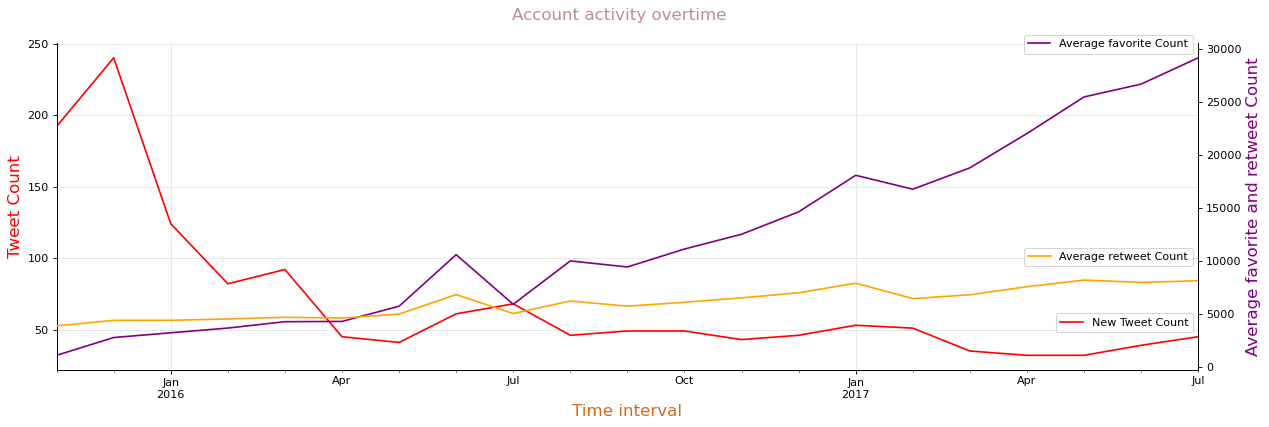

In [141]:
# setup plot
fig, ax = plt.subplots(1,1,figsize=(15,5), dpi=80)
fig.suptitle('Account activity overtime', c='rosybrown', fontsize=15, ha= 'center')
fig.subplots_adjust(top=0.8)
fig.tight_layout()


# Plot Line1 (Left Y Axis), resample timestamp by monthly bins
time_interval_df.groupby(['tweet_time_stamp'])['tweet_id'].count().resample('1m').count().plot(ax=ax,c='red', label='New Tweet Count');

# instantiate a second axes that shares the same x-axis
ax2 = ax.twinx() 

# Plot Line2 (Right Y Axis), resample timestamp by monthly bins
time_interval_df.groupby(['tweet_time_stamp'])['favorite_count'].mean().resample('1m').mean().plot(ax=ax2,c='purple', label='Average favorite Count');

# instantiate a third axes that shares the same x-axis
ax3 = ax.twinx()  

# Plot Line3 (Right Y Axis), resample timestamp by monthly bins
time_interval_df.groupby(['tweet_time_stamp'])['retweet_count'].mean().resample('1m').mean().plot(ax=ax3,c='orange', label='Average retweet Count');


# Decoration
ax.set_xlabel("Time interval", c='chocolate', fontsize=15, x=.5)
ax.set_ylabel("Tweet Count", c='red', fontsize=15); ax2.set_ylabel("Average favorite and retweet Count", c='purple', fontsize=15, x=.5)
ax.grid(alpha=.3)
ax3.axis('off')
ax.spines["top"].set_alpha(0.0); ax2.spines["top"].set_alpha(0.0);ax3.spines["top"].set_alpha(0.0)
ax.spines["top"].set_alpha(0.0); ax2.spines["top"].set_alpha(0.0);ax3.spines["top"].set_alpha(0.0)
ax.legend(loc=4, bbox_to_anchor=(1, .10)); ax2.legend(loc=4, bbox_to_anchor=(1, .95)); ax3.legend(loc=4, bbox_to_anchor=(1, .30))
ax3.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax3.get_yticks())));

<a class="anchor" id="tweet"></a>

### Key drivers of followers engagement  

*  while dog name and stage may be included in each tweet this is not always the case, the following represent minimum content of each tweet:
   - Media either picture or video
   - Descriptive text
   - Rating

- We've incorporated image prediction results into our analysis;  these predictions are outputs of a neural network that can classify breeds of dogs based on their images. By comparing the relative featuring frequency of a specific breed to the corresponding engagement matrices which is in our case __*favorite count*__, we concluded that breed alone does not have a material impact on user engagement. For instance, [Golden retriever](https://dogtime.com/dog-breeds/golden-retriever) breed was featured 138 times but highest favorite count received for a single tweet was 76k while [Portuguese water dog](https://dogtime.com/dog-breeds/portuguese-water-dog) was featured only 3 times with highest favorite count of 85k; [French bulldog](https://dogtime.com/dog-breeds/french-bulldog), [Siberian husky](https://dogtime.com/dog-breeds/siberian-husky) and [Labrador retriever](https://dogtime.com/dog-breeds/labrador-retriever) were featured 25/21/94 times with highest favorite count of 112k/111k/150k respectively. It worth mentioning that image prediction results are not always correct but we did our best filtering out incorrect results specially for outliers and tweets having high user engagement.


- Same as for dog rating, no material effect on user interactions because at the end of the day [They're good dogs Brent](https://www.vox.com/2018/7/23/17603566/dog-rates-good-dogs-brent-brant-got-a-puppy-meme) !. Average rating for tweets included in this data set is 13 where 75% of tweets have a rating of 12, only two outliers though and the top one have an interesting story behind it. [Atticus](https://thedailyatticus.wordpress.com/atticus/) was given highest rating of all time being 1776 , surprisingly the [tweet](https://t.co/GRXwMxLBkh) had relatively low user engagement of almost 5k favorite and 2k retweets. The tweet was created on 4th of July'16 as a celebration of US declaration of Independence day that took place on 1776.


* What's driving higher user engagement? by exploring top favorite tweets and zooming in the outliers we can conclude that: 
  - [Videos](https://databox.com/videos-vs-images-in-facebook-ads) are the star of the show, 80% of top favorite tweets featured videos.
  - Puppers and puppos (small dogs) shine, either alone or with another doggo. In fact, tweets featuring puppos received higher average rating than their counter parts.
  - Doggos' biography counts!. Actually the reason behind why Portuguese water dog breed gained traction while being only featured three times is the fact that 2 of the three tweets featured ex US First doggo ['Sunny'](https://en.wikipedia.org/wiki/Sunny_(dog)) and his sister 'Bo'
  - Pose matters. Check out these pictures from top favorite tweets [Pupper/Doggo](https://twitter.com/dog_rates/status/733109485275860992), [Puppo](https://twitter.com/dog_rates/status/889665388333682689), [Pupper](https://twitter.com/dog_rates/status/866450705531457537), [Zoey](https://twitter.com/dog_rates/status/870374049280663552), [Aja](https://t.co/lsPyyAiF1r). [Honey](https://twitter.com/dog_rates/status/1370171823829049344) is epic, it's a recent tweet though and not from the data set being analyzed.
  - Timing makes a difference. 2nd top favorite tweet is for a [doggo](https://twitter.com/dog_rates/status/822872901745569793) participating in the 2017 [Women's March](https://en.wikipedia.org/wiki/2017_Women%27s_March)

- So as we mentioned earlier, content and context influence user engagement. Tweets composed of a good mixture of both are most likely to receive higher user engagement, this also explains the reason why some tweets featuring same dog breed for example received widely varying favorite counts than others. If you are a dog owner seeking to celebritize your doggo then take this into consideration in your next photo session

- [Golden retriever](https://dogtime.com/dog-breeds/golden-retriever) is the top featured breed in this dataset with a total featuring frequency of 138 times, it's one of the most popular dog breeds in the United States. The breed’s friendly, tolerant attitude makes them great family pets, and their intelligence makes them highly capable working dogs.

In [142]:
doggos_tweets_df.dog_rating.describe().round()

count    1467.0
mean       13.0
std        47.0
min         2.0
25%        10.0
50%        11.0
75%        12.0
max      1776.0
Name: dog_rating, dtype: float64

In [143]:
# top rated doggos
doggos_tweets_df.sort_values('dog_rating',ascending=False).head(10)

,tweet_id,tweet_time_stamp,tweet_text,tweet_link,retweet_count,favorite_count,dog_rating,year,month
580,749981277374128128,2016-07-04 15:00:45,This is Atticus. He's quite simply America af. 1776/10,https://t.co/GRXwMxLBkh,2375,4945,1776.0,2016,7
673,731156023742988288,2016-05-13 16:15:54,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once,https://t.co/yGQI3He3xv,1206,3687,204.0,2016,5
532,758467244762497024,2016-07-28 01:00:57,Why does this never happen at my front door... 165/150,https://t.co/HmwrdfEfUE,2135,4660,165.0,2016,7
1013,684222868335505415,2016-01-05 04:00:18,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110,https://t.co/1zfnTJLt55,1302,3685,121.0,2016,1
749,713900603437621249,2016-03-27 01:29:02,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody,https://t.co/mpvaVxKmc1,697,2725,99.0,2016,3
1144,675853064436391936,2015-12-13 01:41:41,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once,https://t.co/y93p6FLvVw,1196,2531,88.0,2015,12
262,820690176645140481,2017-01-15 17:52:40,The floofs have been released I repeat the floofs have been released. 84/70,https://t.co/NIYC820tmd,3141,12000,84.0,2017,1
764,710658690886586372,2016-03-18 02:46:49,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80,https://t.co/0eb7R1Om12,535,2224,80.0,2016,3
830,704054845121142784,2016-02-28 21:25:30,Here is a whole flock of puppers. 60/50 I'll take the lot,https://t.co/9dpcw6MdWa,878,2812,60.0,2016,2
780,709198395643068416,2016-03-14 02:04:08,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once",https://t.co/sedre1ivTK,610,2358,45.0,2016,3


In [144]:
# Viral tweets
doggos_tweets_df.sort_values('favorite_count',ascending=False).head(10)

,tweet_id,tweet_time_stamp,tweet_text,tweet_link,retweet_count,favorite_count,dog_rating,year,month
617,744234799360020481,2016-06-18 18:26:18,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad),https://t.co/7wE9LTEXC4,74272,150527,13.0,2016,6
248,822872901745569793,2017-01-21 18:26:02,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10,https://t.co/nTz3FtorBc,41870,128706,13.0,2017,1
326,807106840509214720,2016-12-09 06:17:20,This is Stephan. He just wants to help. 13/10 such a good boy,https://t.co/DkBYaCAg2d,54153,116247,13.0,2016,12
97,866450705531457537,2017-05-22 00:28:40,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender",https://t.co/wk7TfysWHr,31608,112745,13.0,2017,5
642,739238157791694849,2016-06-04 23:31:25,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee),https://t.co/YcXgHfp1EC,55348,111331,13.0,2016,6
53,879415818425184262,2017-06-26 19:07:24,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici),https://t.co/UDT7ZkcTgY,39054,96143,13.0,2017,6
269,819004803107983360,2017-01-11 02:15:36,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet,https://t.co/AdPKrI8BZ1,36069,85489,14.0,2017,1
84,870374049280663552,2017-06-01 20:18:38,This is Zoey. She really likes the planet. Would hate to see willful ignorance and the denial of fairly elemental science destroy it. 13/10,https://t.co/T1xlgaPujm,23693,76464,13.0,2017,6
58,877736472329191424,2017-06-22 03:54:17,This is Aja. She was just told she's a good dog. Suspicions confirmed. 13/10 would tell again,https://t.co/lsPyyAiF1r,16587,72001,13.0,2017,6
31,884925521741709313,2017-07-12 00:01:00,"This is Earl. He found a hat. Nervous about what you think of it. 12/10 it's delightful, Earl",https://t.co/MYJvdlNRVa,15766,69901,12.0,2017,7


In [145]:
# building a dataframe for breed being the observational unit and favorite count/frequency as variables. focusing on favorite count being key engagement metrics

df_1=doggos_breeds_df.groupby(['breed'],as_index=False)['favorite_count'].max().round().reset_index().rename(columns={'favorite_count':'max_fav_count'})
df_2=doggos_breeds_df.groupby(['breed'],as_index=False)['favorite_count'].min().round().reset_index().rename(columns={'favorite_count':'min_fav_count'})
df_3=doggos_breeds_df.groupby(['breed'],as_index=False)['favorite_count'].mean().round().reset_index().rename(columns={'favorite_count':'avg_fav_count'})
df_4=doggos_breeds_df.groupby(['breed'],as_index=False)['favorite_count'].sum().round().reset_index().rename(columns={'favorite_count':'total_fav_count'})
df_5=doggos_breeds_df.breed.value_counts().to_frame().reset_index().rename(columns={'index':'breed','breed':'featuring_frequency'})

# list of df to merge
data_frames_list=[df_1,df_2,df_3,df_4,df_5]

# merge
breed_stats_df = reduce(lambda  left,right: pd.merge(left,right,on=['breed'],how='outer'), data_frames_list)

# drop extra columns
breed_stats_df.drop(columns=['index_x','index_y'],axis=1,inplace=True)

In [146]:
breed_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 0 to 114
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   breed                115 non-null    object 
 1   max_fav_count        115 non-null    int64  
 2   min_fav_count        115 non-null    int64  
 3   avg_fav_count        115 non-null    float64
 4   total_fav_count      115 non-null    int64  
 5   featuring_frequency  115 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 6.3+ KB


In [147]:
# viral tweets stats in relation to breed category
breed_stats_df.sort_values('max_fav_count', ascending=False).head(10)

,breed,max_fav_count,min_fav_count,avg_fav_count,total_fav_count,featuring_frequency
68,labrador retriever,150527,275,11934.0,1121835,94
82,pembroke welsh corgi,116247,147,11412.0,1015654,89
49,french bulldog,112745,290,16930.0,423243,25
98,siberian husky,111331,569,11198.0,235153,21
11,basset hound,96143,425,18335.0,256685,14
85,portuguese water dog,85489,30863,53631.0,160892,3
53,golden retriever,76464,172,11301.0,1559516,138
33,chesapeake bay retriever,72001,146,9347.0,214978,23
63,italian greyhound,69901,156,7708.0,123335,16
35,chow chow,68757,395,8947.0,366812,41


In [148]:
# query data from tweets master data frame
query_df=doggos_breeds_df[doggos_breeds_df.breed.str.contains('labrador retriever')]
doggos_tweets_df[doggos_tweets_df.tweet_id.isin(query_df.tweet_id)].sort_values('favorite_count', ascending=False).head()

,tweet_id,tweet_time_stamp,tweet_text,tweet_link,retweet_count,favorite_count,dog_rating,year,month
617,744234799360020481,2016-06-18 18:26:18,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad),https://t.co/7wE9LTEXC4,74272,150527,13.0,2016,6
248,822872901745569793,2017-01-21 18:26:02,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10,https://t.co/nTz3FtorBc,41870,128706,13.0,2017,1
215,830583320585068544,2017-02-12 01:04:29,This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well,https://t.co/SATN4If5H5,16144,65017,13.0,2017,2
146,849051919805034497,2017-04-04 00:12:06,This is Kevin. Kevin doesn't give a single h*ck. Will sit in the fountain if he wants to. 13/10 churlish af,https://t.co/r6GjO6MbZz,7964,40478,13.0,2017,4
640,739544079319588864,2016-06-05 19:47:03,This... is a Tyrannosaurus rex. We only rate dogs. Please only send in dogs. Thank you ...10/10,https://t.co/zxw8d5g94P,20210,37939,10.0,2016,6


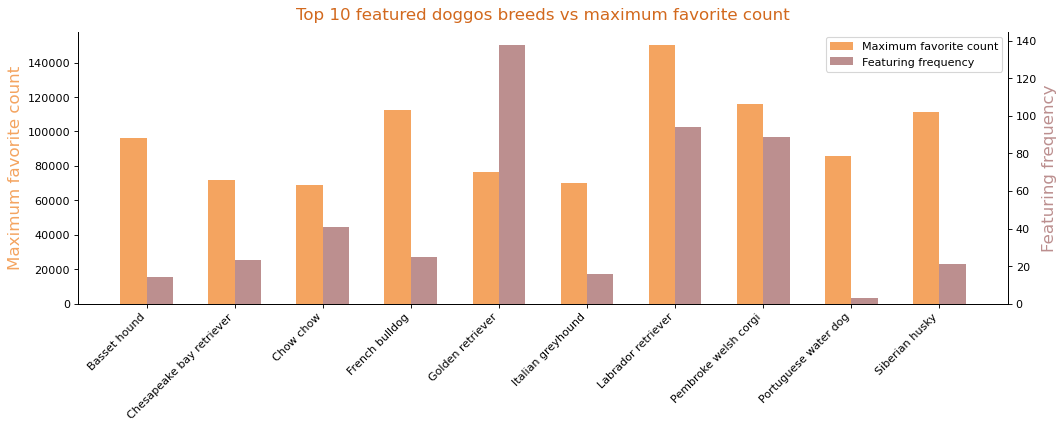

In [149]:
# Prepare Data

# top 10 viral tweets categorized by breeds
top_breeds_df = breed_stats_df[breed_stats_df.index.isin(breed_stats_df.sort_values('max_fav_count', ascending=False).head(10).index)]


# setup plot
fig, ax = plt.subplots(1,1,figsize=(15,5), dpi=80)
fig.autofmt_xdate(rotation=45)

# Number of bars, must match number of rows
x = np.arange(10)
# width 
w = 0.3

# Plot Bars
fav_count =ax.bar(x, top_breeds_df['max_fav_count'], width=w, color='sandybrown', align='center')

#instantiate a 2nd axes that shares the same x-axis
ax2 = ax.twinx()

feat_freq =ax2.bar(x + w, top_breeds_df['featuring_frequency'], width=w, color='rosybrown',align='center')

# Decoration
ax.set_ylabel("Maximum favorite count", c='sandybrown', fontsize=15); ax2.set_ylabel("Featuring frequency", c='rosybrown', fontsize=15)
ax.spines["top"].set_alpha(0.0); ax2.spines["top"].set_alpha(0.0)
plt.xticks(x + w /2, top_breeds_df.breed.str.capitalize())
plt.title("Top 10 featured doggos breeds vs maximum favorite count", c='chocolate', fontsize=15, ha= 'center', y=1.02)
plt.legend([fav_count, feat_freq],['Maximum favorite count', 'Featuring frequency']);

In [150]:
# execulde missing names and stages
doggo_name_df=doggos_breeds_df[~(doggos_breeds_df.dog_name.isnull())]
doggo_stage_df=doggos_breeds_df[~(doggos_breeds_df.dog_stage.isnull())]

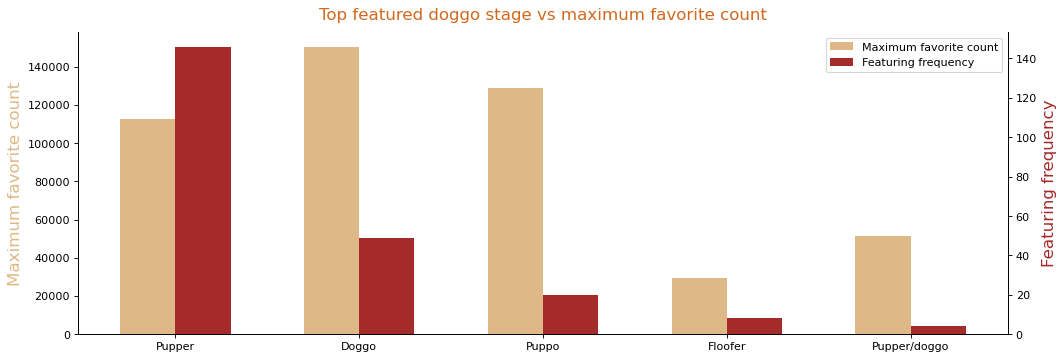

In [151]:
# Prepare Data

# building a dataframe for stage being the observational unit and favorite count/frequency as variables.

df_1 = doggo_stage_df.dog_stage.value_counts().to_frame().reset_index().rename(columns={'index':'dog_stage','dog_stage':'featuring_frequency'})
df_2 = doggo_stage_df.groupby(['dog_stage'],as_index=False)['favorite_count'].max().round().reset_index().rename(columns={'favorite_count':'max_fav_count'})

data_frames_list=[df_1,df_2]
stage_stats_df = reduce(lambda  left,right: pd.merge(left,right,on=['dog_stage'],how='outer'), data_frames_list)
stage_stats_df.drop(columns=['index'],axis=1,inplace=True)

# Plot Bars
fig, ax = plt.subplots(1,1,figsize=(15,5), dpi=80)

# Number of bars, must match number of rows
x = np.arange(5)
# width
w = 0.3

fav_count =ax.bar(x, stage_stats_df['max_fav_count'], width=w, color='burlywood', align='center')

#instantiate a 2nd axes that shares the same x-axis
ax2 = ax.twinx()
feat_freq =ax2.bar(x + w, stage_stats_df['featuring_frequency'], width=w,color='brown',align='center')


# Decoration

ax.set_ylabel("Maximum favorite count", color='burlywood', fontsize=15); ax2.set_ylabel("Featuring frequency", color='brown', fontsize=15)
ax.spines["top"].set_alpha(0.0); ax2.spines["top"].set_alpha(0.0)
plt.xticks(x + w /2, stage_stats_df.dog_stage.str.capitalize())
plt.title("Top featured doggo stage vs maximum favorite count", c='chocolate', fontsize=15, ha= 'center', y=1.02)
plt.legend([fav_count, feat_freq],['Maximum favorite count', 'Featuring frequency']);

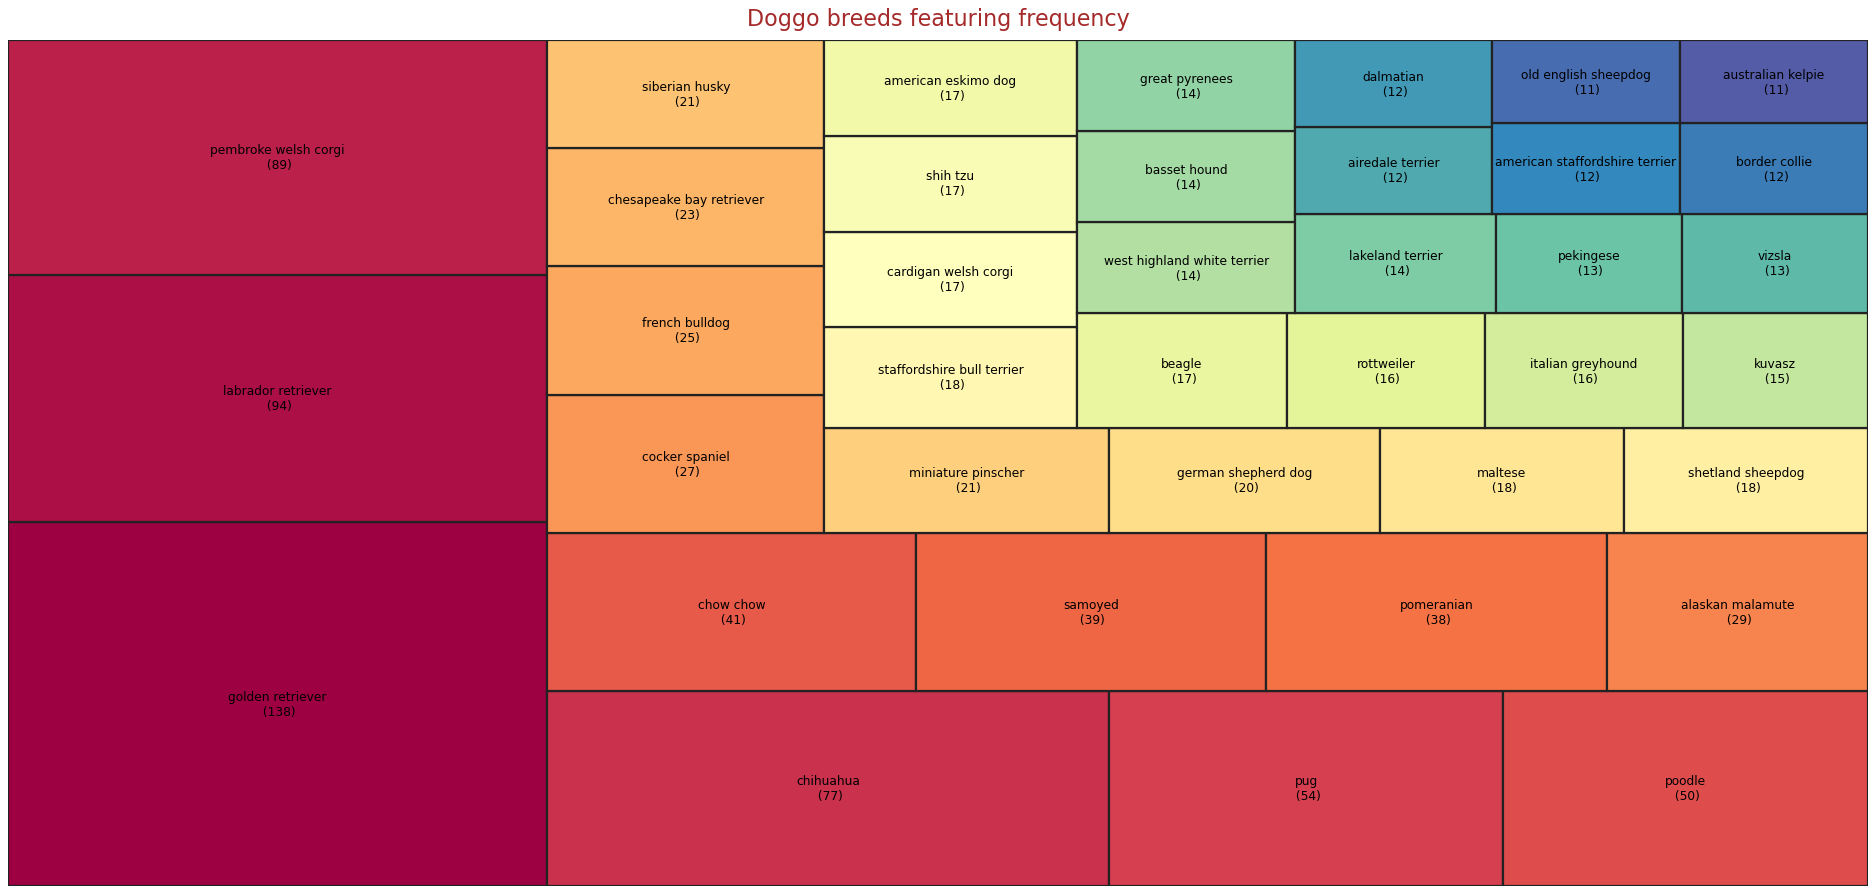

In [152]:
# Prepare Data

# breeds featured more than 10 times
df = doggos_breeds_df.breed.value_counts().to_frame().reset_index().rename(columns={'index':'breed','breed':'featuring_frequency'})
featuring_frequency_df = df[df.featuring_frequency > 10]

# setup plot labels, box sizes and colors
labels = featuring_frequency_df.apply(lambda x: str(x[0]) + "\n ("+ str(x[1]) + ")", axis=1)
sizes = featuring_frequency_df['featuring_frequency'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(30,14), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=1, bar_kwargs=dict(linewidth=2, edgecolor="#222222"), text_kwargs=dict(fontsize=11));

# Decorate
plt.title('Doggo breeds featuring frequency', fontsize=20, y=1.01, c='brown')
plt.axis('off');

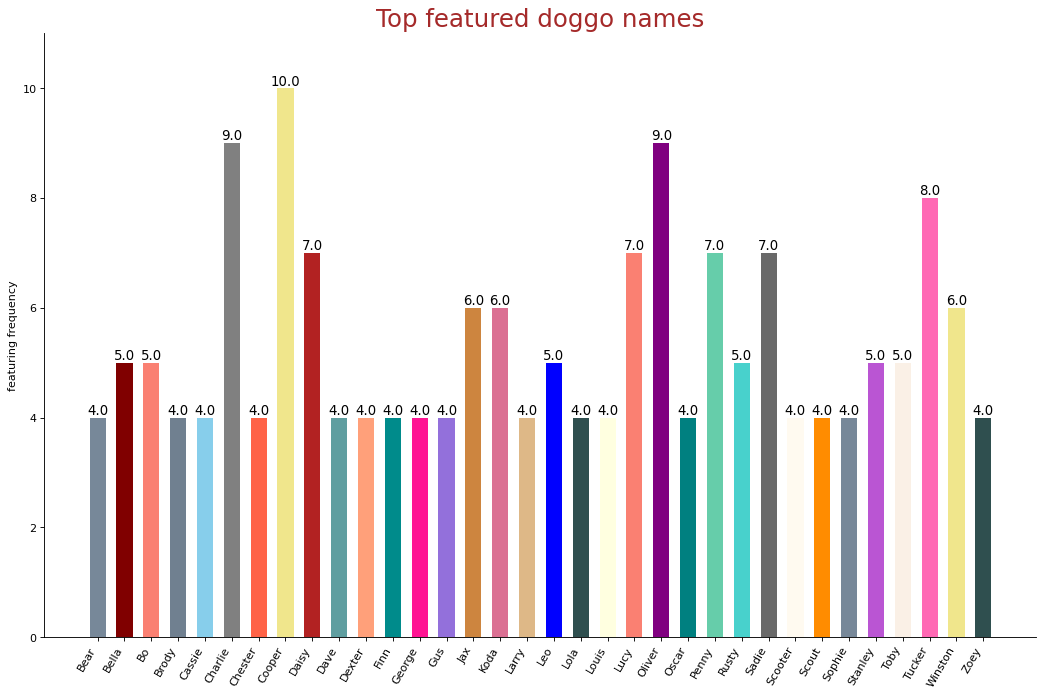

In [153]:
# Prepare Data

# featuring frequency
df = doggo_name_df.dog_name.value_counts().to_frame().reset_index().rename(columns={'index':'dog_name','dog_name':'featuring_frequency'})

# excluding single occurrence
frequent_names_df=df[df.featuring_frequency>3].sort_values('dog_name')

# number of rows for coloring each bars
n = frequent_names_df['dog_name'].unique().__len__()+1

# all colors are stored in the below list, use it to explore different ones
all_colors = list(plt.cm.colors.cnames.keys())

# setting up colors of each bar
random.seed(len(frequent_names_df))
c = random.choices(all_colors, k=n)

# Plot Bars
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(frequent_names_df['dog_name'], frequent_names_df['featuring_frequency'], color=c, width=.6)

# displaying y axis numbers on top of the bars
for i, val in enumerate(frequent_names_df['featuring_frequency'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Decoration
plt.gca().set_xticklabels(frequent_names_df['dog_name'], rotation=60, horizontalalignment= 'right')
plt.title("Top featured doggo names", fontsize=22, c='brown')
plt.ylabel('featuring frequency')
plt.ylim(0, 11)
plt.gca().spines["top"].set_alpha(0.0); plt.gca().spines["right"].set_alpha(0.0)

###### Male doggos dominate, not fair !

**<a href="#analysis" style='color:#8D38C9'>Analysis and visualization</a>**